# LIBRARIES UNIT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

## PRE-PROCESSING UNIT

### GETTING INSIGHT UNIT (PRE-PROCESSING UNIT)

In [2]:
df = pd.read_csv('AQI Data Set.csv')
df

Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3   
0    1  Jan-17          174.0          26.4           35.0                79  \
1    2  Feb-17          143.0          35.1           40.3                75   
2    3  Mar-17          142.0          32.1           30.9                59   
3    4  Apr-17          117.0          50.9           36.3                75   
4    5  May-17            NaN          41.6           25.2                53   
..  ..     ...            ...           ...            ...               ...   
67  68  Aug-22           89.0          12.0           35.0                22   
68  69  Sep-22           92.0          13.0           37.3                30   
69  70  Oct-22           93.0          12.0           30.7                46   
70  71  Nov-22           87.0          10.4           28.2                78   
71  72  Dec-22           88.0          13.0           34.5                72   

    Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   Benzene  in æg/m3   
0                      25.0          107.6          0.90                0.70  \
1                      31.0          103.0          0.90                0.90   
2                      26.0           80.7          0.80                0.50   
3                      36.0           79.5          0.90                0.70   
4                      28.0           70.0          0.50                0.50   
..                      ...            ...           ...                 ...   
67                     26.0           15.2          0.64                0.09   
68                     31.0           10.0          0.70                0.06   
69                     28.0            9.7          0.67                0.07   
70                     30.0           12.1          1.52                0.03   
71                     15.0           16.5          1.39                0.04   

      AQI  
0   149.0  
1   129.0  
2   128.0  
3   111.0  
4     NaN  
..    ...  
67   67.0  
68   76.0  
69  101.0  
70  166.0  
71  162.0  

[72 rows x 11 columns]

In [3]:
df

Id Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3   
0    1  Jan-17          174.0          26.4           35.0                79  \
1    2  Feb-17          143.0          35.1           40.3                75   
2    3  Mar-17          142.0          32.1           30.9                59   
3    4  Apr-17          117.0          50.9           36.3                75   
4    5  May-17            NaN          41.6           25.2                53   
..  ..     ...            ...           ...            ...               ...   
67  68  Aug-22           89.0          12.0           35.0                22   
68  69  Sep-22           92.0          13.0           37.3                30   
69  70  Oct-22           93.0          12.0           30.7                46   
70  71  Nov-22           87.0          10.4           28.2                78   
71  72  Dec-22           88.0          13.0           34.5                72   

    Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   Benzene  in æg/m3   
0                      25.0          107.6          0.90                0.70  \
1                      31.0          103.0          0.90                0.90   
2                      26.0           80.7          0.80                0.50   
3                      36.0           79.5          0.90                0.70   
4                      28.0           70.0          0.50                0.50   
..                      ...            ...           ...                 ...   
67                     26.0           15.2          0.64                0.09   
68                     31.0           10.0          0.70                0.06   
69                     28.0            9.7          0.67                0.07   
70                     30.0           12.1          1.52                0.03   
71                     15.0           16.5          1.39                0.04   

      AQI  
0   149.0  
1   129.0  
2   128.0  
3   111.0  
4     NaN  
..    ...  
67   67.0  
68   76.0  
69  101.0  
70  166.0  
71  162.0  

[72 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       72 non-null     int64  
 1   Mounths                  72 non-null     object 
 2   PM10 in æg/m3            66 non-null     float64
 3   SO2 in æg/m3             71 non-null     float64
 4   NOx  in æg/m3            70 non-null     float64
 5    PM2.5  in æg/m3         72 non-null     int64  
 6   Ammonia - NH3  in æg/m3  72 non-null     float64
 7   O3   in æg/m3            72 non-null     float64
 8   CO  in mg/m3             72 non-null     float64
 9    Benzene  in æg/m3       72 non-null     float64
 10  AQI                      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [5]:
df.describe()

Id  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   PM2.5  in æg/m3   
count  72.00000      66.000000     71.000000      70.000000         72.000000  \
mean   36.50000     109.393939     16.650704      30.171429         46.722222   
std    20.92845      25.271376      9.783746       4.150088         20.224251   
min     1.00000      76.000000      4.000000      18.400000         12.000000   
25%    18.75000      90.000000      9.900000      28.025000         27.000000   
50%    36.50000     104.000000     14.000000      29.700000         47.000000   
75%    54.25000     128.000000     19.200000      32.550000         63.000000   
max    72.00000     178.000000     50.900000      40.300000         87.000000   

       Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   
count                72.000000      72.000000     72.000000  \
mean                 23.997222      27.790278      0.549722   
std                   5.824450      22.585906      0.238764   
min                  11.000000       2.400000      0.200000   
25%                  20.000000      12.475000      0.400000   
50%                  23.000000      20.750000      0.500000   
75%                  28.000000      35.550000      0.647500   
max                  37.000000     107.600000      1.520000   

        Benzene  in æg/m3         AQI  
count            72.00000   67.000000  
mean              0.22500  105.571642  
std               0.19307   22.762574  
min               0.00000   58.000000  
25%               0.10000   91.300000  
50%               0.20000  103.500000  
75%               0.30000  119.500000  
max               0.90000  166.000000

In [6]:
df.isnull()

Id  Mounths  PM10 in æg/m3  SO2 in æg/m3  NOx  in æg/m3   
0   False    False          False         False          False  \
1   False    False          False         False          False   
2   False    False          False         False          False   
3   False    False          False         False          False   
4   False    False           True         False          False   
..    ...      ...            ...           ...            ...   
67  False    False          False         False          False   
68  False    False          False         False          False   
69  False    False          False         False          False   
70  False    False          False         False          False   
71  False    False          False         False          False   

     PM2.5  in æg/m3  Ammonia - NH3  in æg/m3  O3   in æg/m3  CO  in mg/m3   
0              False                    False          False         False  \
1              False                    False          False         False   
2              False                    False          False         False   
3              False                    False          False         False   
4              False                    False          False         False   
..               ...                      ...            ...           ...   
67             False                    False          False         False   
68             False                    False          False         False   
69             False                    False          False         False   
70             False                    False          False         False   
71             False                    False          False         False   

     Benzene  in æg/m3    AQI  
0                False  False  
1                False  False  
2                False  False  
3                False  False  
4                False   True  
..                 ...    ...  
67               False  False  
68               False  False  
69               False  False  
70               False  False  
71               False  False  

[72 rows x 11 columns]

In [7]:
df.isna().sum()

Id                         0
Mounths                    0
PM10 in æg/m3              6
SO2 in æg/m3               1
NOx  in æg/m3              2
 PM2.5  in æg/m3           0
Ammonia - NH3  in æg/m3    0
O3   in æg/m3              0
CO  in mg/m3               0
 Benzene  in æg/m3         0
AQI                        5
dtype: int64

###  DATA CLEANING SUBPART (PRE-PROCESSING UNIT)

In [8]:
# for 
new = df.copy()

In [9]:
new.columns

Index(['Id', 'Mounths', 'PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3',
       ' PM2.5  in æg/m3', 'Ammonia - NH3  in æg/m3', 'O3   in æg/m3',
       'CO  in mg/m3', ' Benzene  in æg/m3', 'AQI'],
      dtype='object')

In [10]:
cols = ['id', 'Months', 'PM10', 'SO2', 'NOx', 'PM2.5', 'NH3', 'O3', 'CO', 'Benzene', 'AQI']

In [11]:
new.columns = cols


In [12]:
new

id  Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0    1  Jan-17  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1    2  Feb-17  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2    3  Mar-17  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3    4  Apr-17  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
4    5  May-17    NaN  41.6  25.2     53  28.0   70.0  0.50     0.50    NaN
..  ..     ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67  68  Aug-22   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68  69  Sep-22   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69  70  Oct-22   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70  71  Nov-22   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71  72  Dec-22   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[72 rows x 11 columns]

In [13]:
new.isnull().sum()

id         0
Months     0
PM10       6
SO2        1
NOx        2
PM2.5      0
NH3        0
O3         0
CO         0
Benzene    0
AQI        5
dtype: int64

In [14]:
a = np.mean(new['PM10'])
a

109.39393939393939

In [15]:
new['PM10'] = new['PM10'].fillna(np.mean(new['PM10']))

In [16]:
new['PM10'].isnull().sum()

0

In [17]:
new.isnull().sum()

id         0
Months     0
PM10       0
SO2        1
NOx        2
PM2.5      0
NH3        0
O3         0
CO         0
Benzene    0
AQI        5
dtype: int64

In [18]:
new.describe()

id        PM10        SO2        NOx      PM2.5        NH3   
count  72.00000   72.000000  71.000000  70.000000  72.000000  72.000000  \
mean   36.50000  109.393939  16.650704  30.171429  46.722222  23.997222   
std    20.92845   24.180005   9.783746   4.150088  20.224251   5.824450   
min     1.00000   76.000000   4.000000  18.400000  12.000000  11.000000   
25%    18.75000   90.750000   9.900000  28.025000  27.000000  20.000000   
50%    36.50000  105.500000  14.000000  29.700000  47.000000  23.000000   
75%    54.25000  123.500000  19.200000  32.550000  63.000000  28.000000   
max    72.00000  178.000000  50.900000  40.300000  87.000000  37.000000   

               O3         CO   Benzene         AQI  
count   72.000000  72.000000  72.00000   67.000000  
mean    27.790278   0.549722   0.22500  105.571642  
std     22.585906   0.238764   0.19307   22.762574  
min      2.400000   0.200000   0.00000   58.000000  
25%     12.475000   0.400000   0.10000   91.300000  
50%     20.750000   0.500000   0.20000  103.500000  
75%     35.550000   0.647500   0.30000  119.500000  
max    107.600000   1.520000   0.90000  166.000000

In [19]:
for i in new['SO2']:
    if i == 'NaN':
        new['SO2'].drop(i)

In [20]:
i

13.0

In [21]:
new = new.dropna()

In [22]:
new

id  Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0    1  Jan-17  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1    2  Feb-17  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2    3  Mar-17  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3    4  Apr-17  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6    7  Jul-17  111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..  ..     ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67  68  Aug-22   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68  69  Sep-22   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69  70  Oct-22   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70  71  Nov-22   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71  72  Dec-22   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 11 columns]

### RE-CHECKING THE INSIGHTS

In [23]:
new.describe()

id        PM10        SO2        NOx      PM2.5        NH3   
count  66.000000   66.000000  66.000000  66.000000  66.000000  66.000000  \
mean   38.500000  109.393939  16.093939  30.263636  46.393939  24.072727   
std    20.417376   25.271376   9.265218   3.947838  20.261277   5.960474   
min     1.000000   76.000000   4.000000  18.400000  12.000000  11.000000   
25%    22.250000   90.000000   9.850000  28.125000  27.500000  20.250000   
50%    38.500000  104.000000  13.700000  29.750000  46.500000  23.000000   
75%    55.750000  128.000000  17.150000  32.550000  62.750000  28.000000   
max    72.000000  178.000000  50.900000  40.300000  87.000000  37.000000   

               O3         CO    Benzene         AQI  
count   66.000000  66.000000  66.000000   66.000000  
mean    25.350000   0.551212   0.213636  104.807576  
std     21.426413   0.241550   0.190922   22.054250  
min      2.400000   0.200000   0.000000   58.000000  
25%     12.025000   0.400000   0.100000   90.950000  
50%     18.750000   0.500000   0.150000  103.250000  
75%     31.575000   0.640000   0.300000  119.000000  
max    107.600000   1.520000   0.900000  166.000000

In [24]:
new.isna().sum()

id         0
Months     0
PM10       0
SO2        0
NOx        0
PM2.5      0
NH3        0
O3         0
CO         0
Benzene    0
AQI        0
dtype: int64

In [25]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 0 to 71
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       66 non-null     int64  
 1   Months   66 non-null     object 
 2   PM10     66 non-null     float64
 3   SO2      66 non-null     float64
 4   NOx      66 non-null     float64
 5   PM2.5    66 non-null     int64  
 6   NH3      66 non-null     float64
 7   O3       66 non-null     float64
 8   CO       66 non-null     float64
 9   Benzene  66 non-null     float64
 10  AQI      66 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.2+ KB


In [26]:
new.head()

id  Months   PM10   SO2   NOx  PM2.5   NH3     O3   CO  Benzene    AQI
0   1  Jan-17  174.0  26.4  35.0     79  25.0  107.6  0.9      0.7  149.0
1   2  Feb-17  143.0  35.1  40.3     75  31.0  103.0  0.9      0.9  129.0
2   3  Mar-17  142.0  32.1  30.9     59  26.0   80.7  0.8      0.5  128.0
3   4  Apr-17  117.0  50.9  36.3     75  36.0   79.5  0.9      0.7  111.0
6   7  Jul-17  111.0  38.9  21.5     29  30.0   24.4  0.3      0.7  106.7

In [27]:
new.dtypes

id           int64
Months      object
PM10       float64
SO2        float64
NOx        float64
PM2.5        int64
NH3        float64
O3         float64
CO         float64
Benzene    float64
AQI        float64
dtype: object

In [28]:
new = new.drop(columns=['id'])

In [29]:
new

Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   Jan-17  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   Feb-17  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   Mar-17  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   Apr-17  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   Jul-17  111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..     ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67  Aug-22   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68  Sep-22   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69  Oct-22   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70  Nov-22   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71  Dec-22   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 10 columns]

In [30]:
#parsing the date and time of the dateset 
new['Months'] = pd.to_datetime(new['Months'], format='%b-%y')

In [31]:
new

Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0  2017-01-01  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1  2017-02-01  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2  2017-03-01  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3  2017-04-01  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6  2017-07-01  111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..        ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67 2022-08-01   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68 2022-09-01   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69 2022-10-01   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70 2022-11-01   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71 2022-12-01   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 10 columns]

In [32]:
new['Months'] = new['Months'].dt.strftime('%m-%y')

In [33]:
new

Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   01-17  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   02-17  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   03-17  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   04-17  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   07-17  111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67  08-22   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68  09-22   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69  10-22   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70  11-22   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71  12-22   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 10 columns]

# STATISTICAL ANALYSIS UNIT

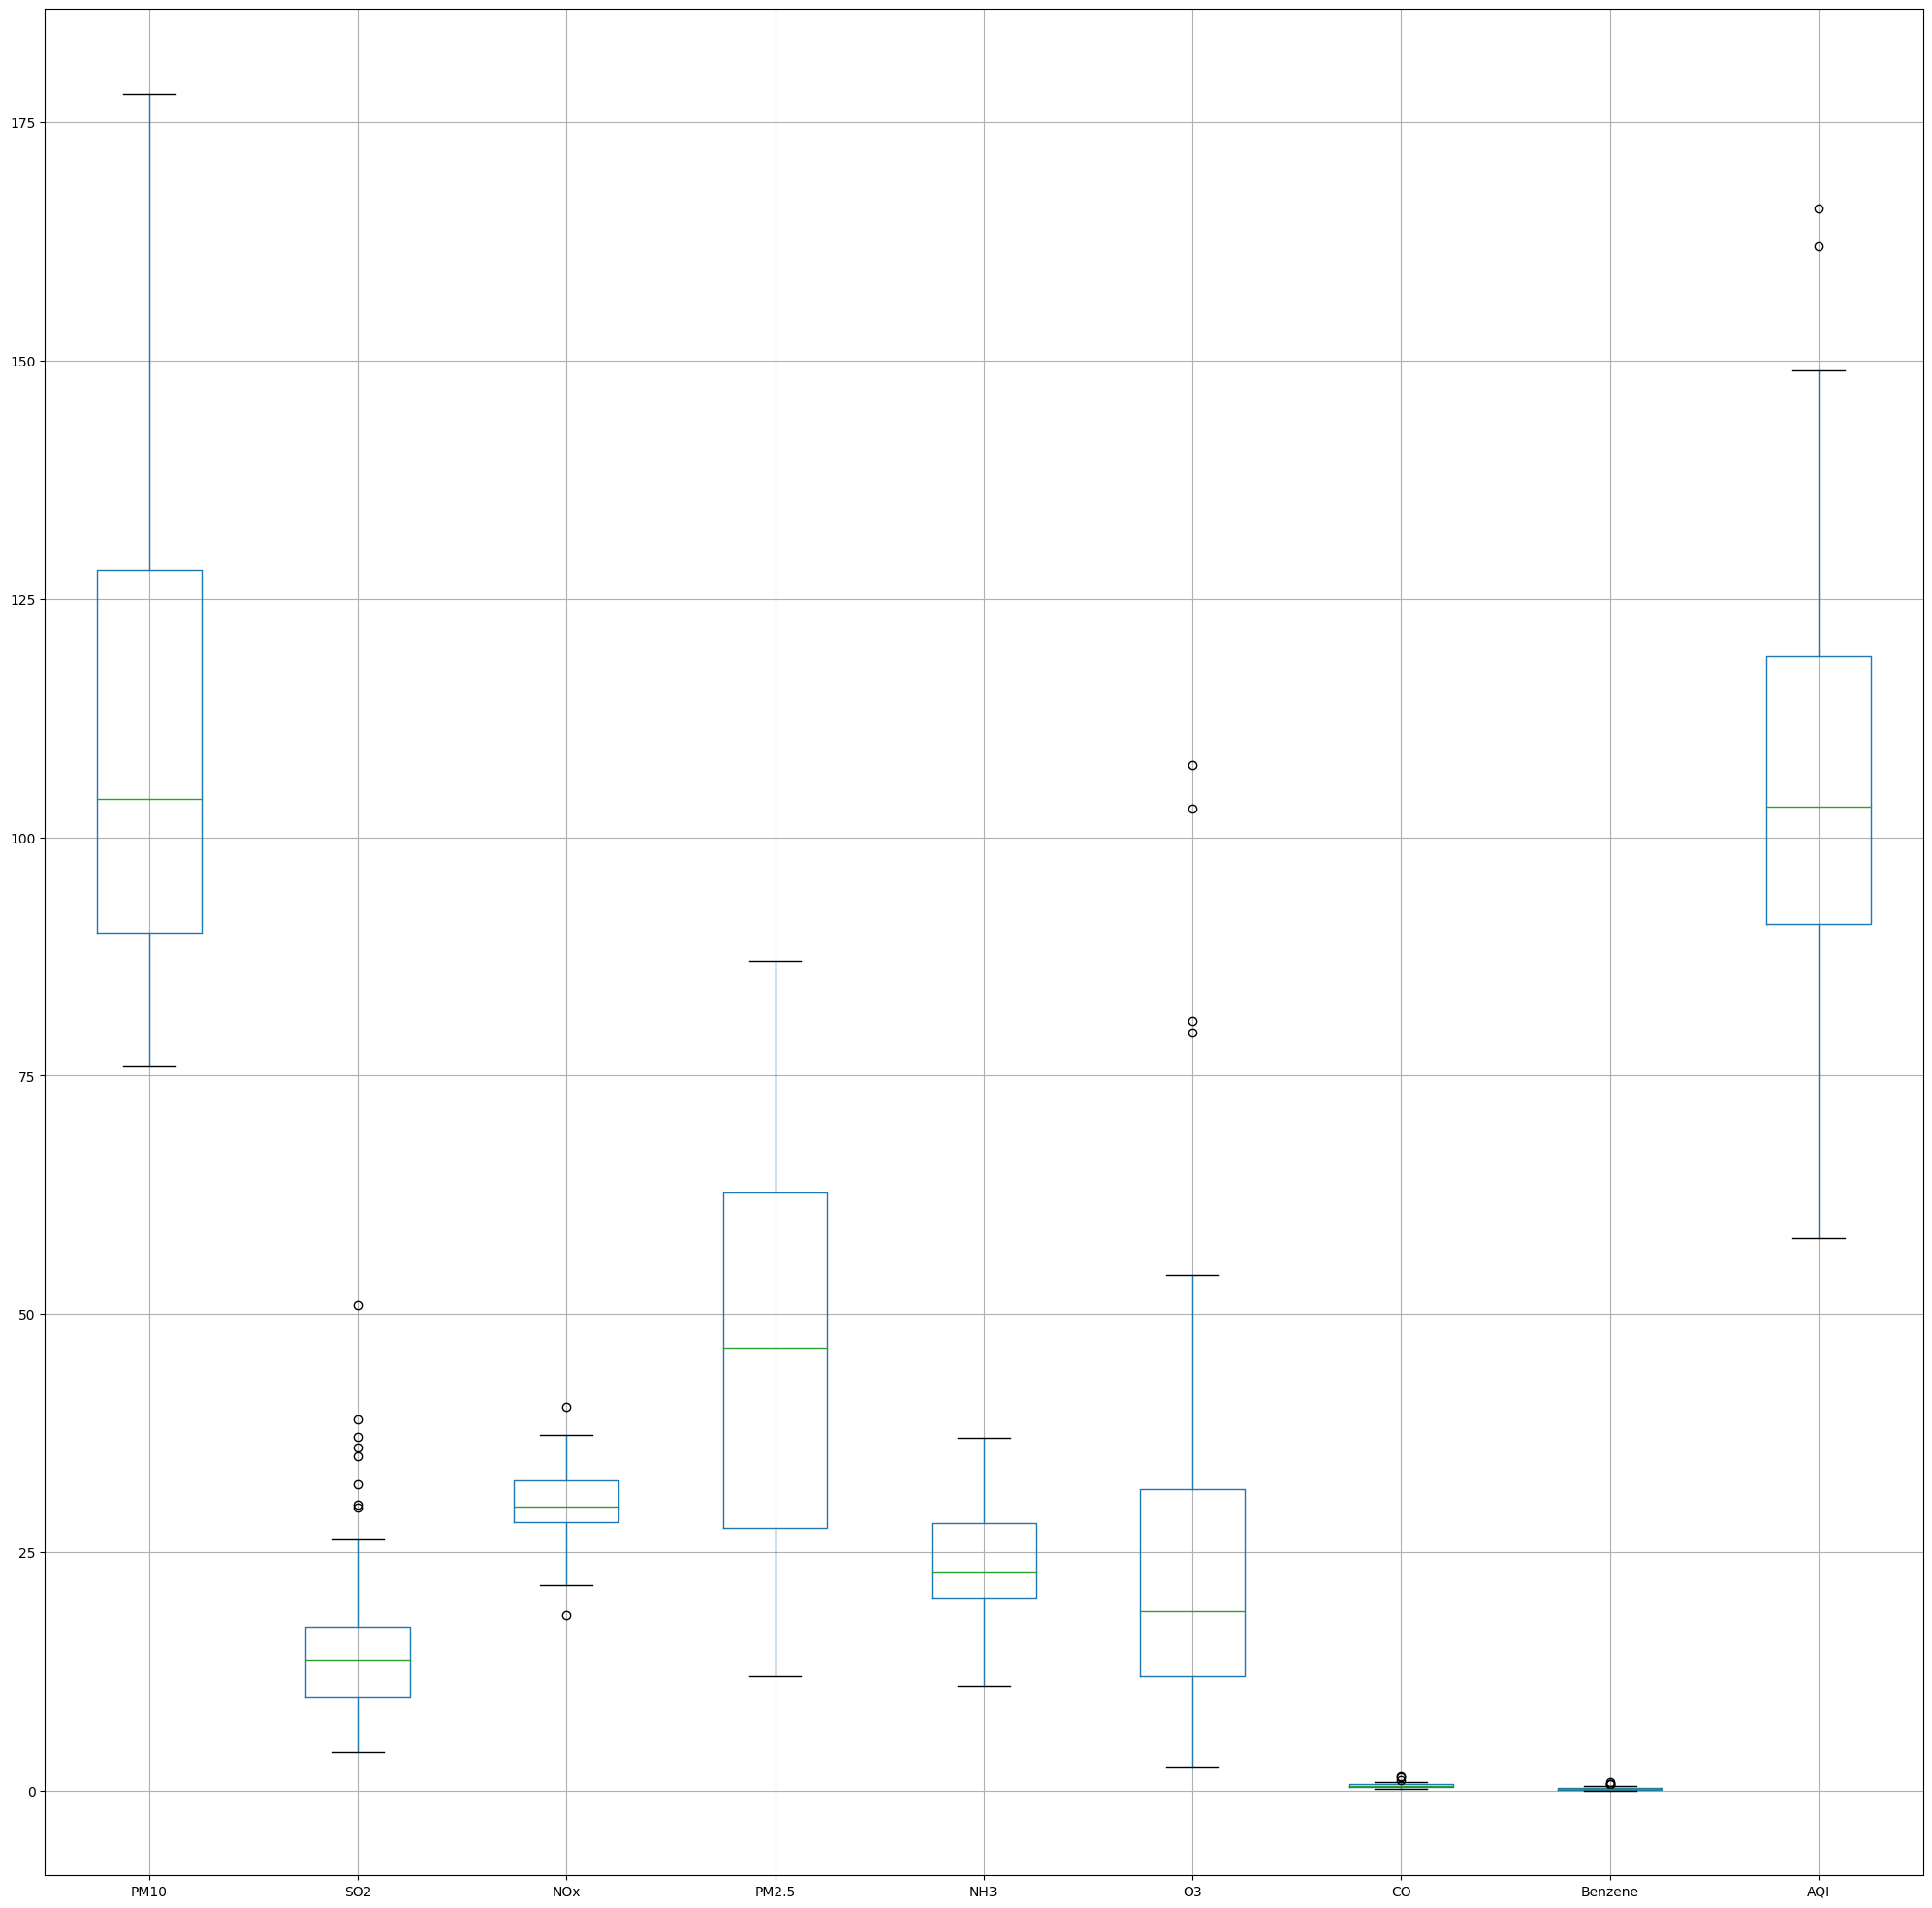

In [34]:
%matplotlib inline
new.boxplot(figsize=(25, 25))
plt.show()

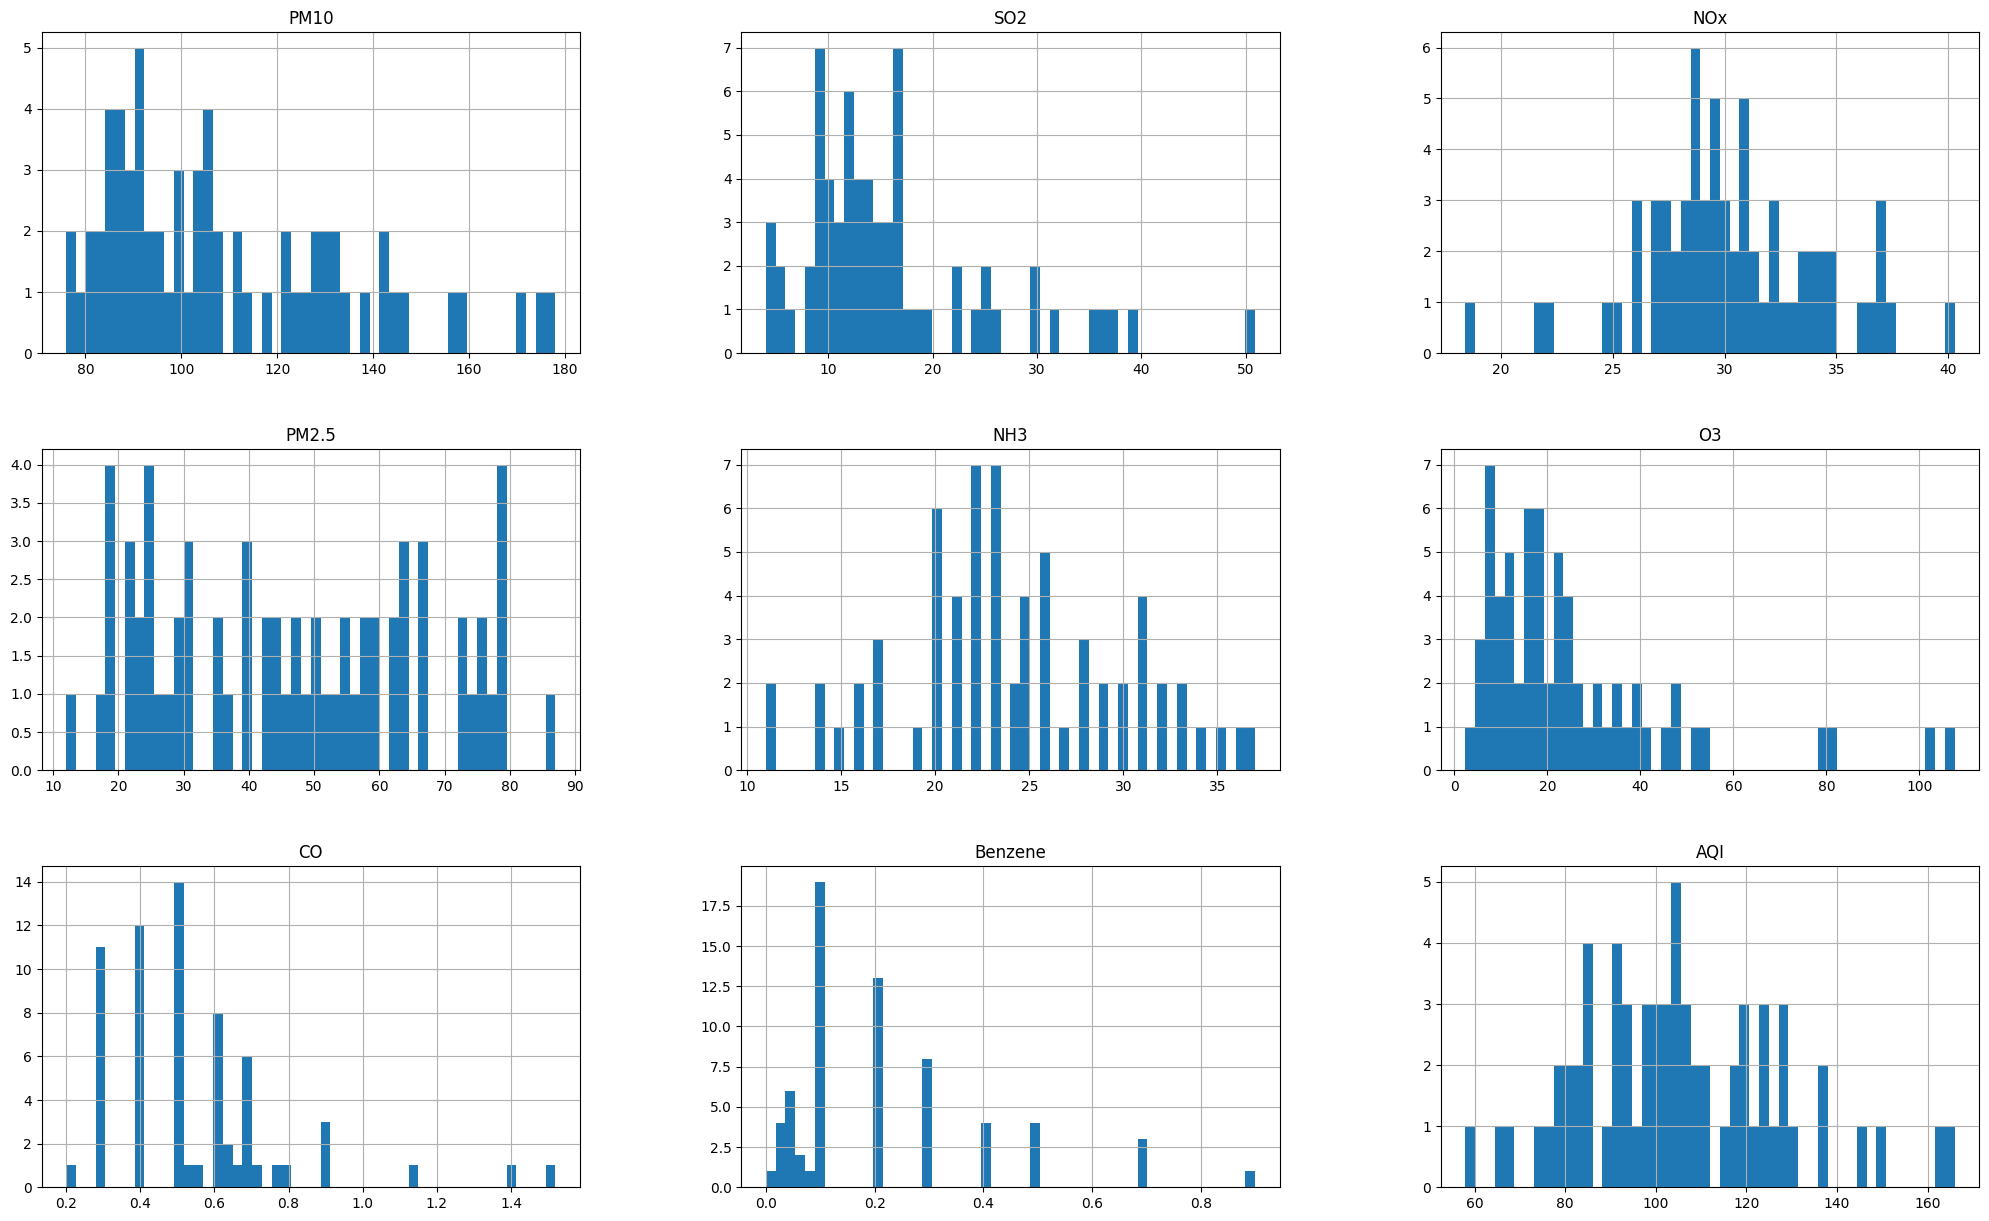

In [35]:
%matplotlib inline
new.hist(bins= 50, figsize=(25, 15))
plt.show()

#### ANALYSISNG THE DATA AS ACCORDING TO MONTHS WITH THE HELP OF PAIRPLOT

<Figure size 500x300 with 0 Axes>

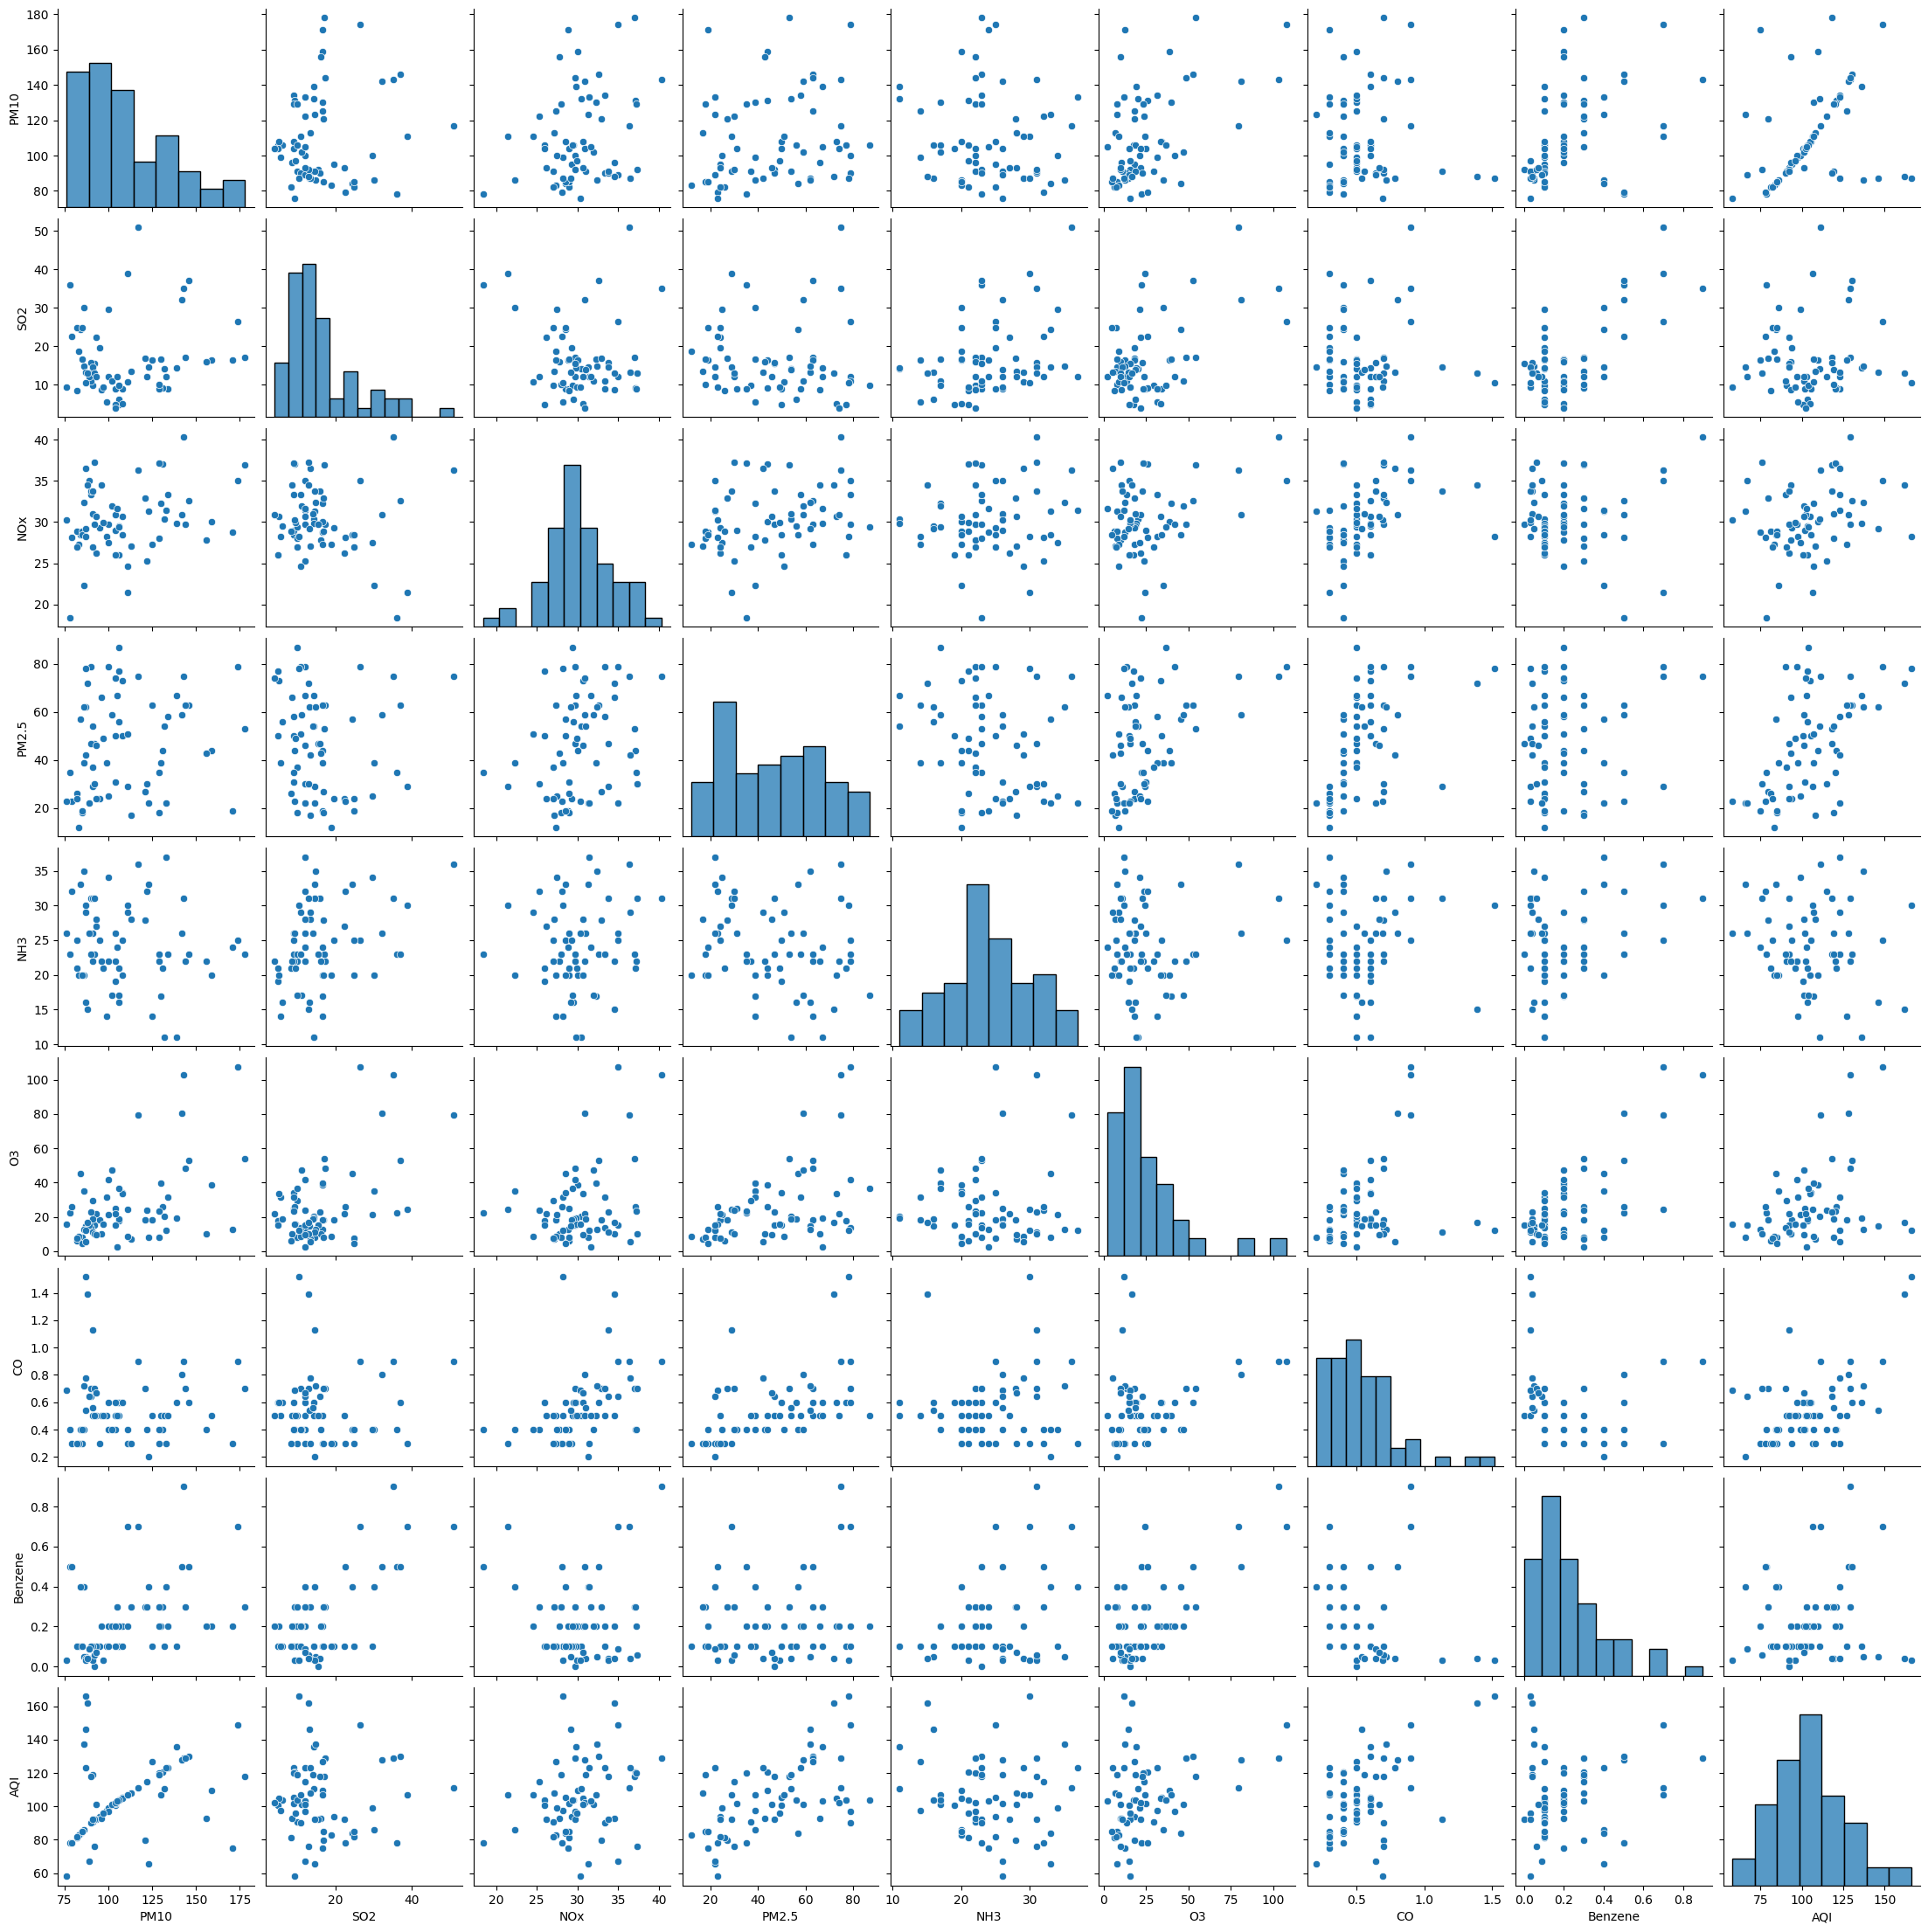

In [36]:
plt.figure(figsize=(5,3))
sns.pairplot(new)
plt.show()

<Figure size 500x300 with 0 Axes>

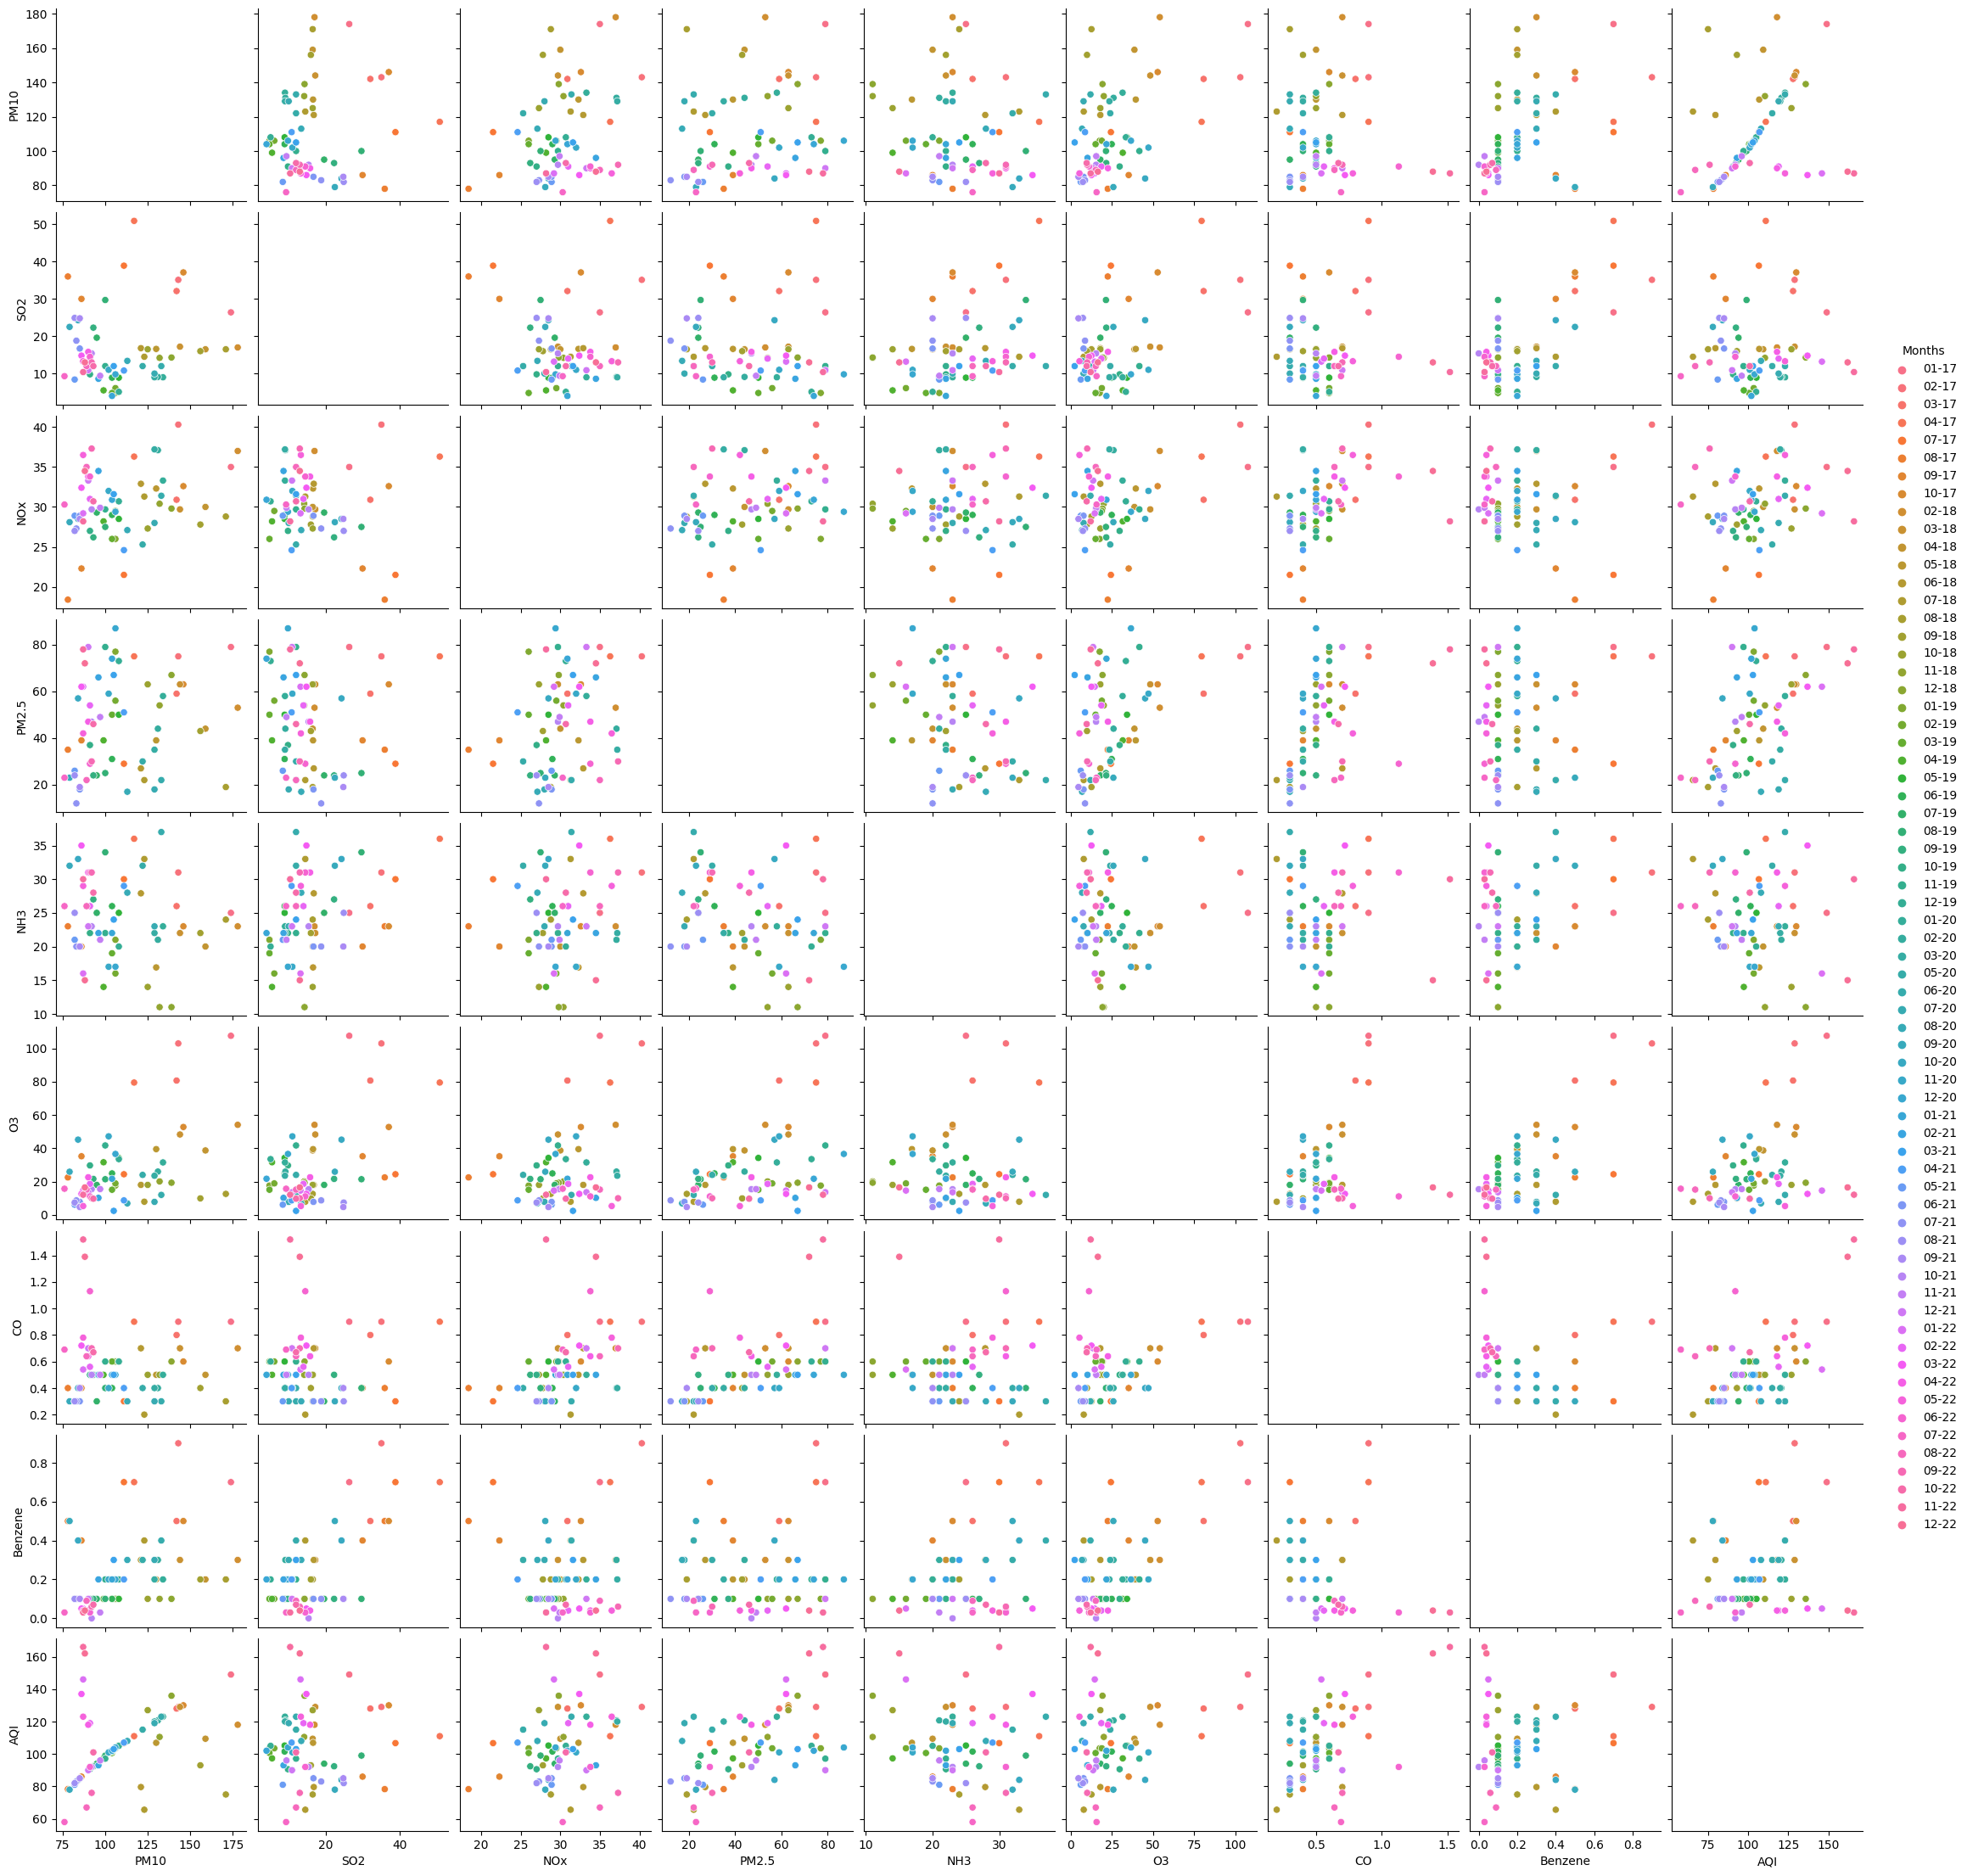

In [37]:
plt.figure(figsize=(5,3))
sns.pairplot(new, hue="Months")
plt.show()

In [38]:
sd = new.copy()

In [39]:
sd

Months   PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   01-17  174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   02-17  143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   03-17  142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   04-17  117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   07-17  111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...    ...   ...   ...    ...   ...    ...   ...      ...    ...
67  08-22   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68  09-22   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69  10-22   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70  11-22   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71  12-22   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 10 columns]

In [40]:
sd = sd.drop(columns=['Months'])

In [41]:
sd

PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...   ...   ...    ...   ...    ...   ...      ...    ...
67   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 9 columns]

In [42]:
sd

PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...   ...   ...    ...   ...    ...   ...      ...    ...
67   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 9 columns]

In [43]:
sd.describe()

PM10        SO2        NOx      PM2.5        NH3          O3   
count   66.000000  66.000000  66.000000  66.000000  66.000000   66.000000  \
mean   109.393939  16.093939  30.263636  46.393939  24.072727   25.350000   
std     25.271376   9.265218   3.947838  20.261277   5.960474   21.426413   
min     76.000000   4.000000  18.400000  12.000000  11.000000    2.400000   
25%     90.000000   9.850000  28.125000  27.500000  20.250000   12.025000   
50%    104.000000  13.700000  29.750000  46.500000  23.000000   18.750000   
75%    128.000000  17.150000  32.550000  62.750000  28.000000   31.575000   
max    178.000000  50.900000  40.300000  87.000000  37.000000  107.600000   

              CO    Benzene         AQI  
count  66.000000  66.000000   66.000000  
mean    0.551212   0.213636  104.807576  
std     0.241550   0.190922   22.054250  
min     0.200000   0.000000   58.000000  
25%     0.400000   0.100000   90.950000  
50%     0.500000   0.150000  103.250000  
75%     0.640000   0.300000  119.000000  
max     1.520000   0.900000  166.000000

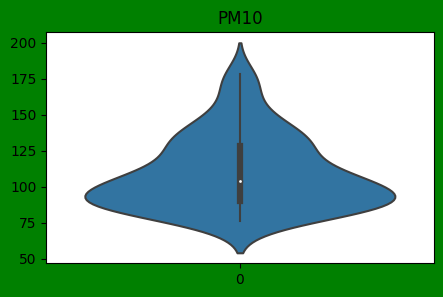

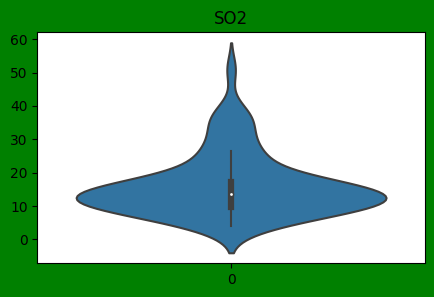

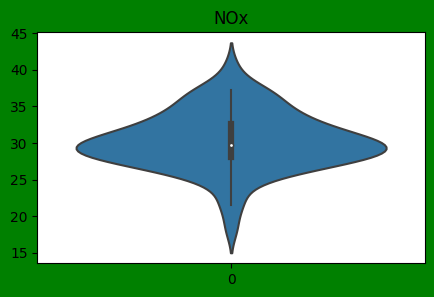

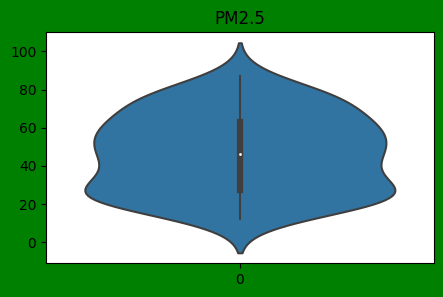

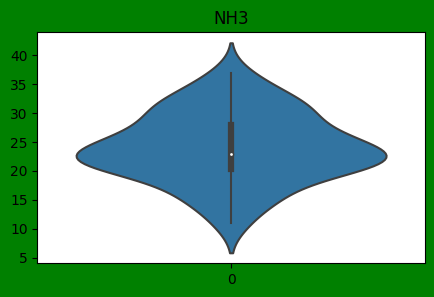

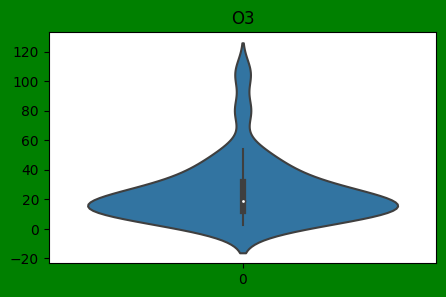

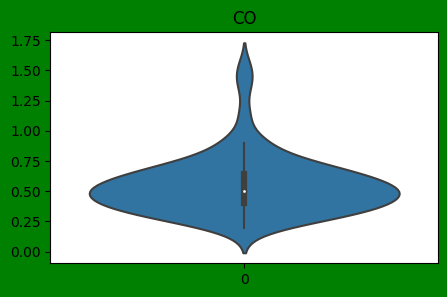

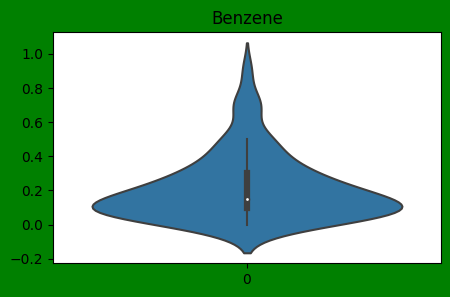

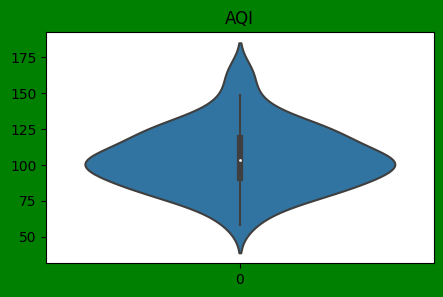

In [44]:
# creating the vilion plot for understanding the data
for col_1 in sd.columns:
    plt.figure(figsize=(5, 3), facecolor='green')
    plt.subplot(1,1,1)
    sns.violinplot(sd[col_1])
    plt.title(col_1)

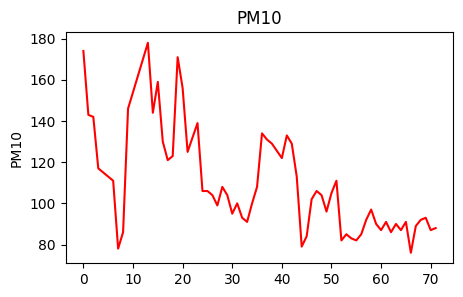

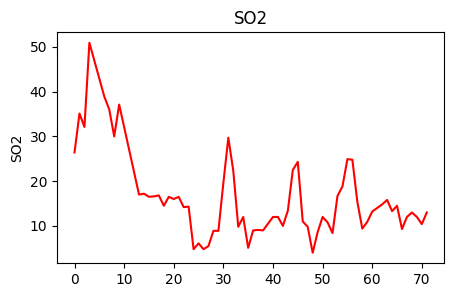

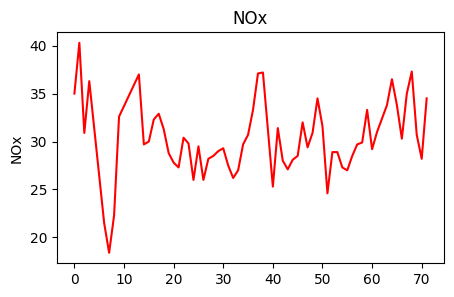

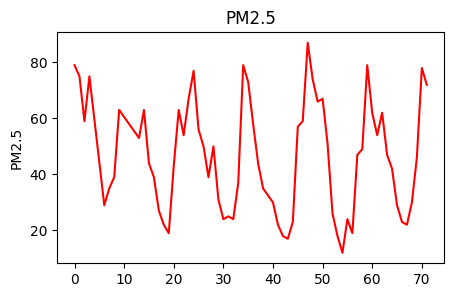

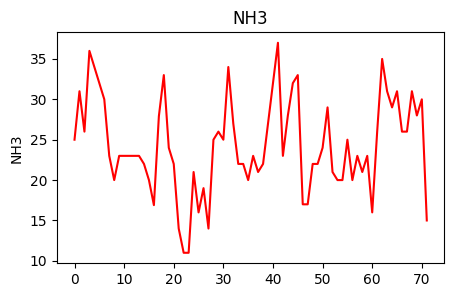

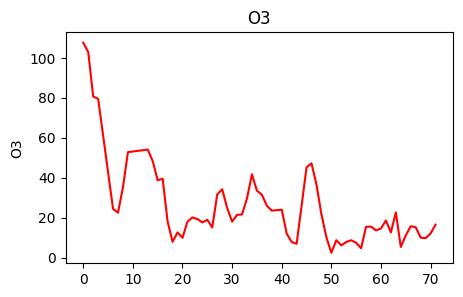

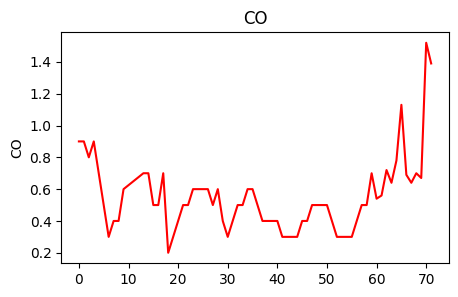

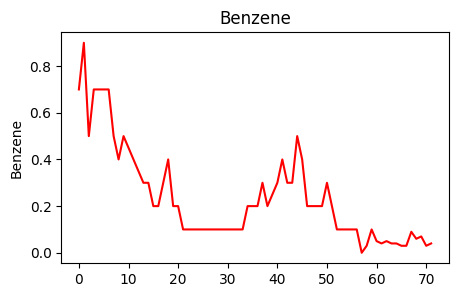

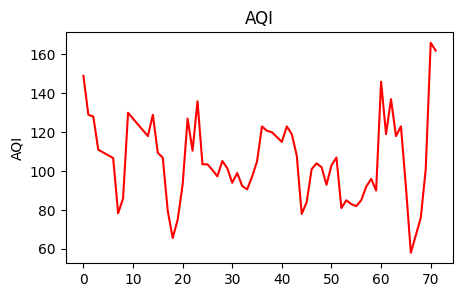

In [45]:
#creating the line plot for understanding the direction and fluctuation in each data.
for col_2 in sd.columns:
    plt.figure(figsize=(5, 3))
    plt.subplot(1,1,1)
    sns.lineplot(sd[col_2], color = 'r' )
    plt.title(col_2)

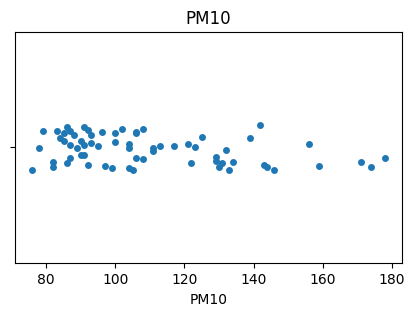

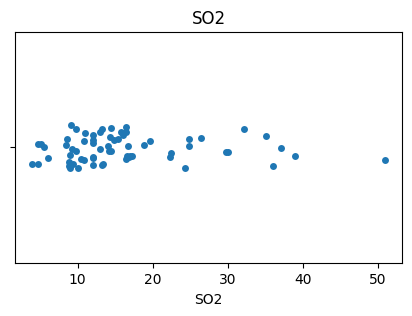

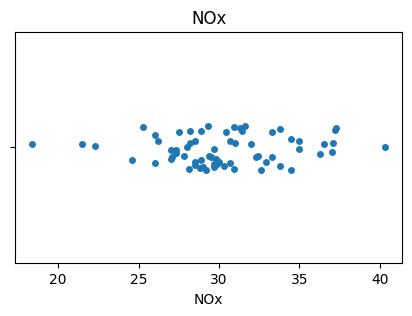

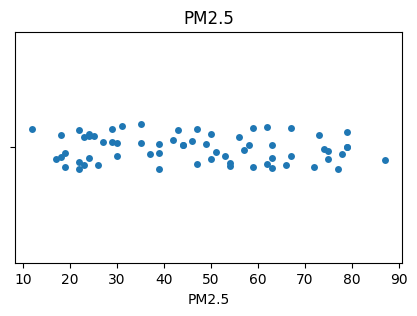

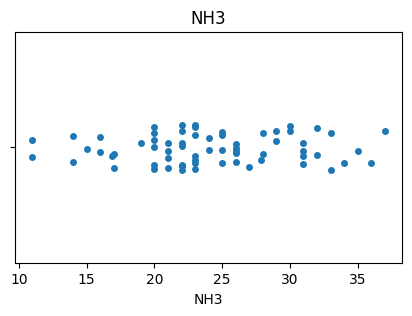

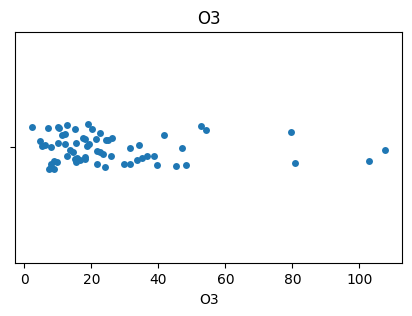

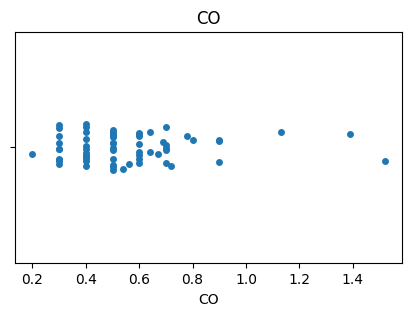

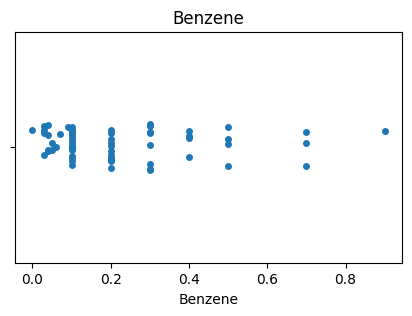

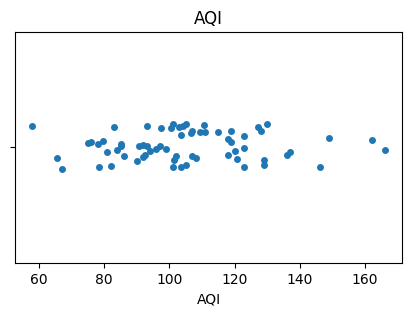

In [46]:
# creating the stripplot for understanding the 
for col_3 in sd.columns:
    plt.figure(figsize=(5, 3))
    plt.subplot(1,1,1)
    sns.stripplot(x = sd[col_3])
    plt.title(col_3)


#### FINDING THE CORRELATION BETWEEN VARIABLES

In [47]:
corr_mat = sd.corr()

In [48]:
corr_mat

PM10       SO2       NOx     PM2.5       NH3        O3        CO   
PM10     1.000000  0.130653  0.274600  0.175313 -0.102564  0.491887 -0.008144  \
SO2      0.130653  1.000000 -0.077940 -0.049921  0.341375  0.506950  0.034320   
NOx      0.274600 -0.077940  1.000000  0.272991  0.128482  0.318803  0.422947   
PM2.5    0.175313 -0.049921  0.272991  1.000000 -0.242080  0.456390  0.532724   
NH3     -0.102564  0.341375  0.128482 -0.242080  1.000000  0.068396  0.071531   
O3       0.491887  0.506950  0.318803  0.456390  0.068396  1.000000  0.289429   
CO      -0.008144  0.034320  0.422947  0.532724  0.071531  0.289429  1.000000   
Benzene  0.443235  0.678788  0.068127  0.132100  0.330064  0.690951 -0.050904   
AQI      0.348128  0.026773  0.255465  0.562250 -0.106118  0.332175  0.530776   

          Benzene       AQI  
PM10     0.443235  0.348128  
SO2      0.678788  0.026773  
NOx      0.068127  0.255465  
PM2.5    0.132100  0.562250  
NH3      0.330064 -0.106118  
O3       0.690951  0.332175  
CO      -0.050904  0.530776  
Benzene  1.000000  0.118064  
AQI      0.118064  1.000000

## ANALYSIS THORUGH LINEAR REGRESSION

### SIMPLE LINEAR REGRESSION 

We are analysing all the possible variable with the help of linear regression and try to get some numeric value insights as accuracy and validation of them. Then after we try to put the transformer according to need.

In [49]:
sd.columns

Index(['PM10', 'SO2', 'NOx', 'PM2.5', 'NH3', 'O3', 'CO', 'Benzene', 'AQI'], dtype='object')

#### FEATURE SELECTION UNIT

Analysis done with the help of Simple Linear regression where we manually select the feature for the training and testing set from dataset. In this simple linear regression the dependent variable or response variable is "AQI" and independent variable or predictor variable is "PM10".

In [50]:
x = sd.drop(columns=['SO2', 'NOx', 'PM2.5', 'NH3', 'O3', 'CO', 'Benzene', 'AQI'])
y = sd.iloc[:, -1]

In [51]:
x

PM10
0   174.0
1   143.0
2   142.0
3   117.0
6   111.0
..    ...
67   89.0
68   92.0
69   93.0
70   87.0
71   88.0

[66 rows x 1 columns]

In [52]:
y = y.astype(int)

In [53]:
y

0     149
1     129
2     128
3     111
6     106
     ... 
67     67
68     76
69    101
70    166
71    162
Name: AQI, Length: 66, dtype: int32

Now we put "PM10" or "PM10 in æg/m3" in "x" variable and "AQI" in "y" variable, where further these x and y are divided into train and test variable for Linear Regression. Now we are ready to split the {x, y} into the train and test variable.

#### TRAIN TEST AND SPLIT UNIT 

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

#### MODEL SELCTION, LOADING , FITTING AND PREDICTING UNIT

In [55]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
predict = model.predict(x_test)

Error accuracy

In [57]:
r2 = r2_score(y_test, predict)
r2

0.44567344167829914

cross validation

In [58]:
np.mean(cross_val_score(model, x_train, y_train, scoring="r2"))

-0.10889642432203091

#### Using boxCox Transformation in PM10

In [59]:
transformer = PowerTransformer(method="box-cox")

In [60]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed = transformer.fit_transform(x_test)
pd.DataFrame({'col':x_train.columns, 'transform':transformer.lambdas_})

col  transform
0  PM10  -0.961053

Again checking the accuracy of Linear model after tranforming the data with power transformer

In [61]:
model = LinearRegression()
model.fit(x_train_transformed, y_train)
predict_n = model.predict(x_test_transformed)

In [62]:
r2 = r2_score(y_test, predict_n)
r2

0.6204748676046099

cross validation of our model

In [63]:
xt_transform = transformer.fit_transform(x)
np.mean(cross_val_score(model, xt_transform, y, scoring='r2'))

-0.0839123202747843

In [64]:
model.coef_

array([7.387052])

"model.coef_" attribute help to show the value of b1 or beta 1 where you can see in this formula y = b0 + b1x + e where y = dependent variable, b0 is y-intercept of regression line and x = independent variable and b1 = slope.

In [65]:
model.intercept_

104.80769230769326

"model.intercept_" attribute help to show the value of b0 which is y-intercept of regression line.

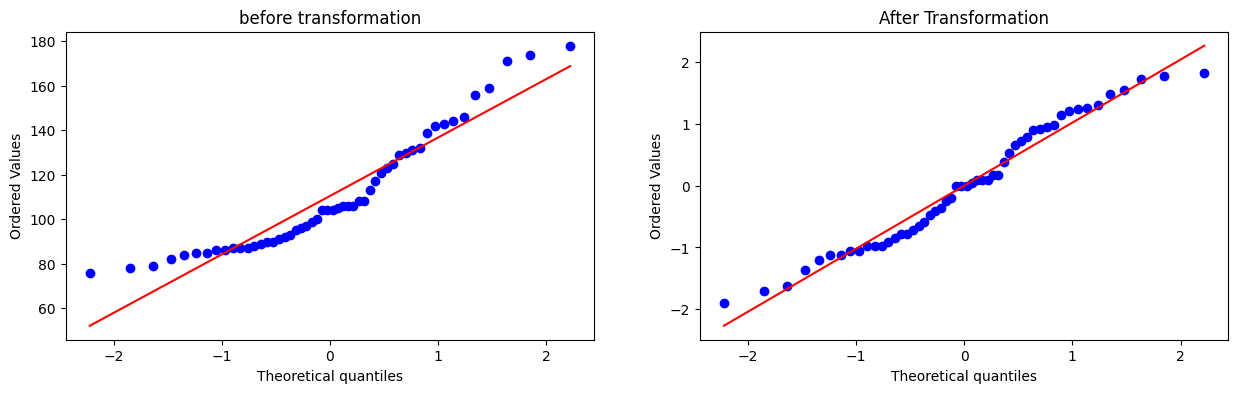

In [66]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
for col_4 in x_train_transformed.columns:
    plt.figure(figsize=(15, 4))
    # X_train plot
    plt.subplot(121)
    stats.probplot(x_train[col_4], dist="norm", plot=plt)
    plt.title("before transformation")
    
    # X_train_transformed plot
    plt.subplot(122)
    stats.probplot(x_train_transformed[col_4], dist="norm", plot=plt)
    plt.title('After Transformation')
    

    plt.show()

### PIPELINES UNIT (STANDARD SCALING, LINEAR REGRESSION)

In [67]:
steps = [('st_scaler', StandardScaler()),
        ('lr', LinearRegression())]

In [68]:
pipe = Pipeline(steps)

In [69]:
pipe

Pipeline(steps=[('st_scaler', StandardScaler()), ('lr', LinearRegression())])

In [70]:
pipe.fit(x_train_transformed, y_train)

Pipeline(steps=[('st_scaler', StandardScaler()), ('lr', LinearRegression())])

In [71]:
standard_prediction = pipe.predict(x_test_transformed)

C:\Users\bhara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [72]:
standard_prediction

array([108.31381172,  98.99148936, 103.63898763,  98.99148936,
       100.10046413, 115.64943246,  99.55188642,  93.34570426,
       112.16052558, 108.31381172, 115.38228041, 104.56246185,
       114.2730781 ,  94.03226931])

In [73]:
standard_r2_score = r2_score(y_test, standard_prediction)
standard_r2_score

0.6204748676046099

Cross validation


In [74]:
print("CROSS VALIDATION SCORE : " ,np.mean(cross_val_score(pipe, x_train_transformed, y_train, scoring='r2')))

CROSS VALIDATION SCORE :  -0.08782508010447734


In [75]:
fig = px.scatter_3d(sd, x = 'PM10',y = 'SO2', z = 'AQI')
fig.show()
fig1 = px.scatter_3d(sd, x = 'NOx', y = 'PM2.5', z = 'AQI')
fig1.show()
fig2 = px.scatter_3d(sd, x = 'NH3', y = 'O3', z = 'AQI')
fig2.show()

## CONCLUSION 

After the whole analysis of simple linear regression we conclude that the data is the data is not to much relatable with each other or in other words the response or dependent variable is not so compatible with independent or predictor variable but it maintain the linear relationship with each other where we can improve with the help of some hypertuner or hyperparameter which holds some properties to enhance the linear relationship between the two variables.

## ANALYSIS WITH MULTIPLE LINEAR REGRESSION UNIT

In [76]:
sd

PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...   ...   ...    ...   ...    ...   ...      ...    ...
67   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 9 columns]

###### MAKING DUPLICATE COPY

In [77]:
df = sd.copy()

In [78]:
df

PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene    AQI
0   174.0  26.4  35.0     79  25.0  107.6  0.90     0.70  149.0
1   143.0  35.1  40.3     75  31.0  103.0  0.90     0.90  129.0
2   142.0  32.1  30.9     59  26.0   80.7  0.80     0.50  128.0
3   117.0  50.9  36.3     75  36.0   79.5  0.90     0.70  111.0
6   111.0  38.9  21.5     29  30.0   24.4  0.30     0.70  106.7
..    ...   ...   ...    ...   ...    ...   ...      ...    ...
67   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09   67.0
68   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06   76.0
69   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07  101.0
70   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03  166.0
71   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04  162.0

[66 rows x 9 columns]

#### FEATURE SELECTION UNIT

In [79]:
x1 = df.drop('AQI', axis = 1)

In [80]:
x1

PM10   SO2   NOx  PM2.5   NH3     O3    CO  Benzene
0   174.0  26.4  35.0     79  25.0  107.6  0.90     0.70
1   143.0  35.1  40.3     75  31.0  103.0  0.90     0.90
2   142.0  32.1  30.9     59  26.0   80.7  0.80     0.50
3   117.0  50.9  36.3     75  36.0   79.5  0.90     0.70
6   111.0  38.9  21.5     29  30.0   24.4  0.30     0.70
..    ...   ...   ...    ...   ...    ...   ...      ...
67   89.0  12.0  35.0     22  26.0   15.2  0.64     0.09
68   92.0  13.0  37.3     30  31.0   10.0  0.70     0.06
69   93.0  12.0  30.7     46  28.0    9.7  0.67     0.07
70   87.0  10.4  28.2     78  30.0   12.1  1.52     0.03
71   88.0  13.0  34.5     72  15.0   16.5  1.39     0.04

[66 rows x 8 columns]

In [81]:
y1 = df.iloc[:, -1]

In [82]:
y1 = y1.astype(int)

#### TRAIN TEST SPLIT UNIT 

In [83]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

In [84]:
x1_train.shape

(49, 8)

In [85]:
y1_train.shape

(49,)

#### MODEL SELCTION, LOADING , FITTING AND PREDICTION UNIT

In [86]:
new_model = LinearRegression()
new_model.fit(x1_train, y1_train)

LinearRegression()

In [87]:
new_predict = new_model.predict(x1_test)

Error Accuracy

In [88]:
r2_new_score = r2_score(y1_test, new_predict)
print("Accuracy score is : ", r2_new_score)

Accuracy score is :  0.31813657353362945


Cross validation

In [89]:
lr = LinearRegression()
print("Cross validation score : ", np.mean(cross_val_score(lr, x1, y1,  scoring="r2")))

Cross validation score :  -0.8122476771350309


In [90]:
new_model.coef_

array([ 0.32160537,  0.14068572, -0.17367234,  0.37898083,  0.58650129,
       -0.19474897, 31.1105629 ,  8.22110955])

If we compare this with previous or simple linear model coefficient than we realized that there is only b1 or single slope vaue is available {beta 1} but in this we have b1.......bn coz it is multiple linear regression.

In [91]:
new_model.intercept_

26.53163341930859

The value of b0 or y-intercept of regression line is 26.53 where on the other hand the value of previous simple linear regression model is 104.

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




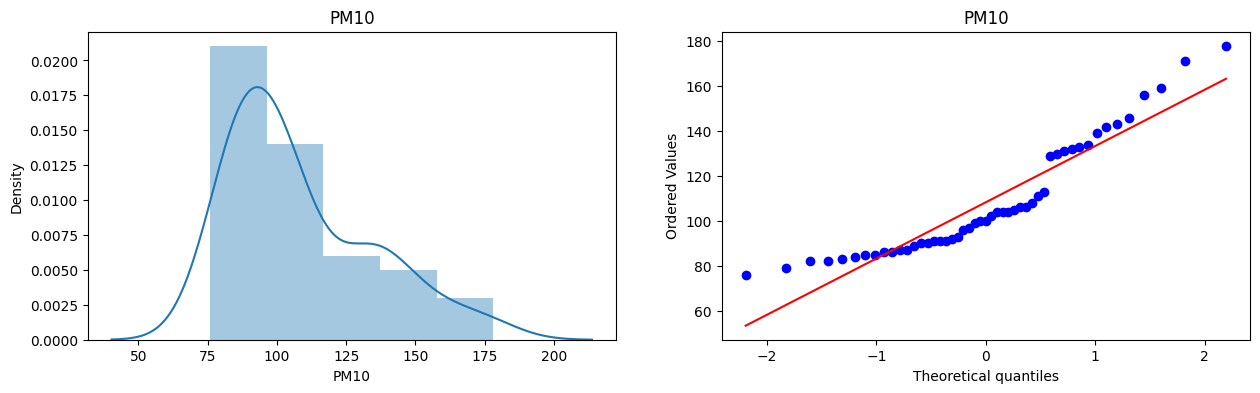

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




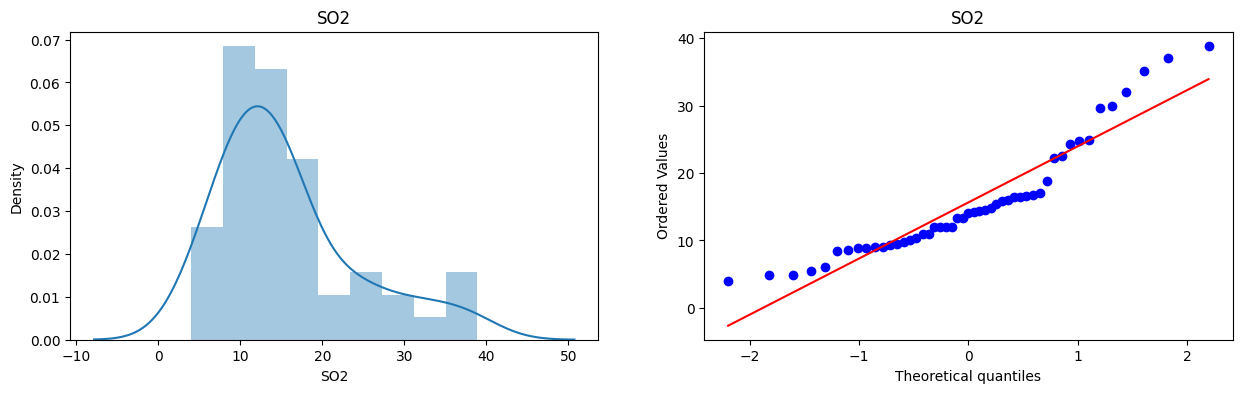

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




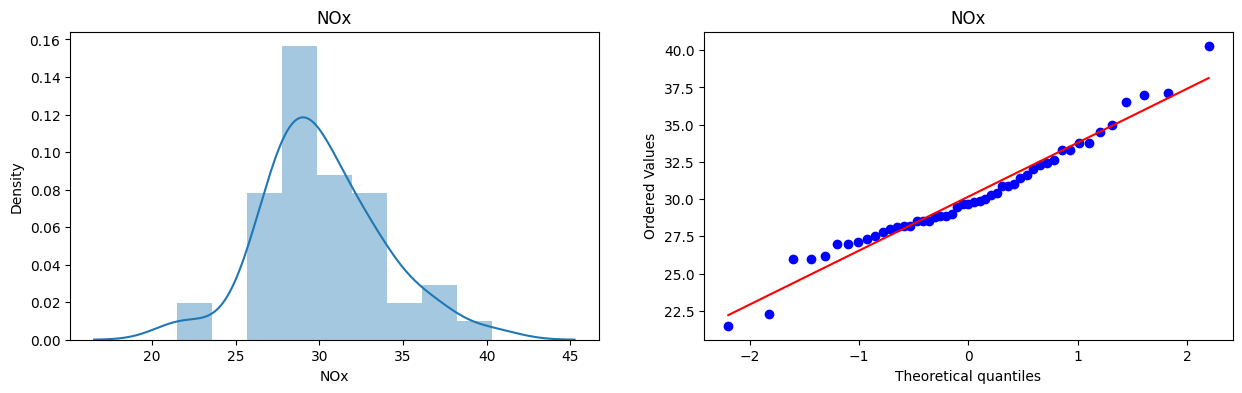

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




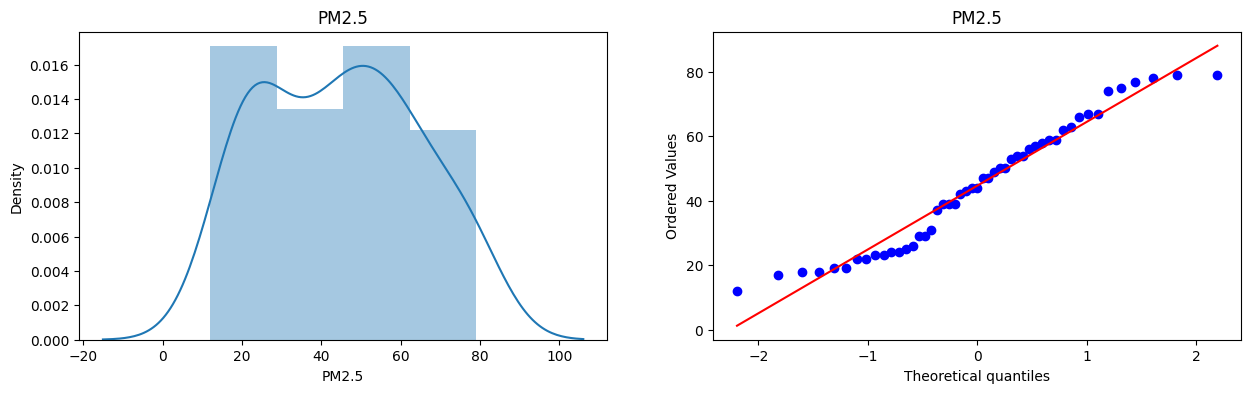

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




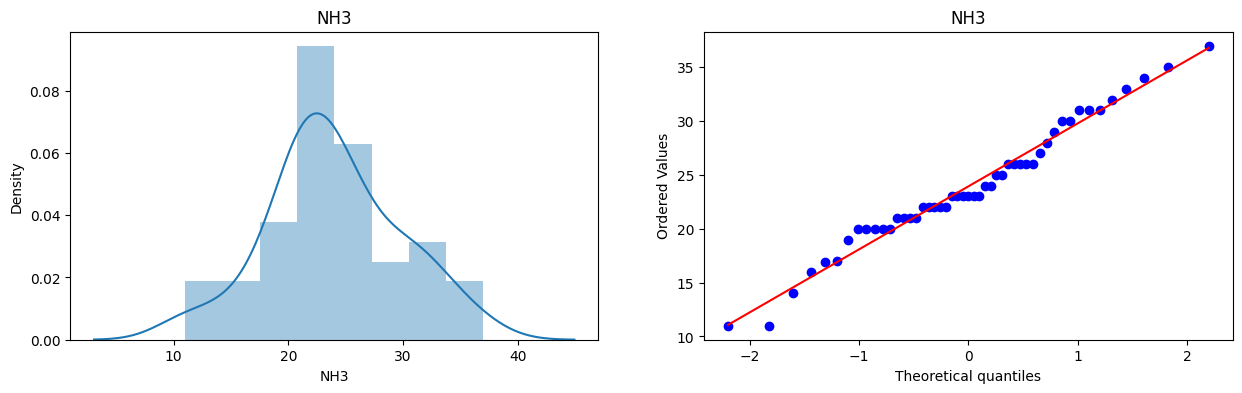

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




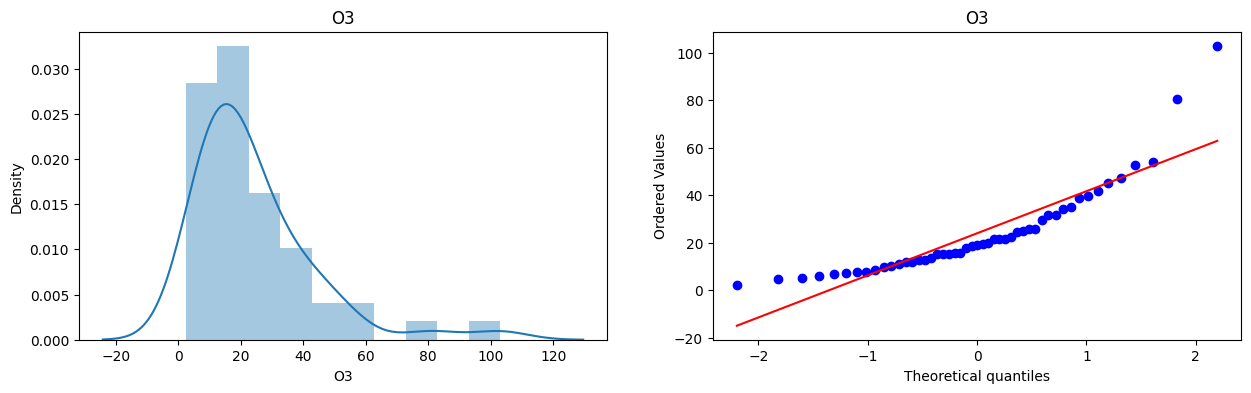

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




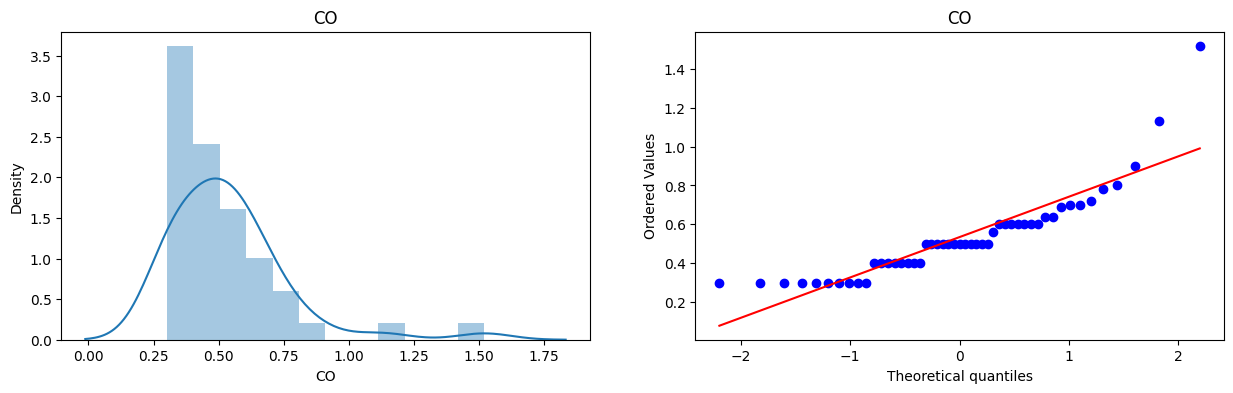

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\3352460559.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




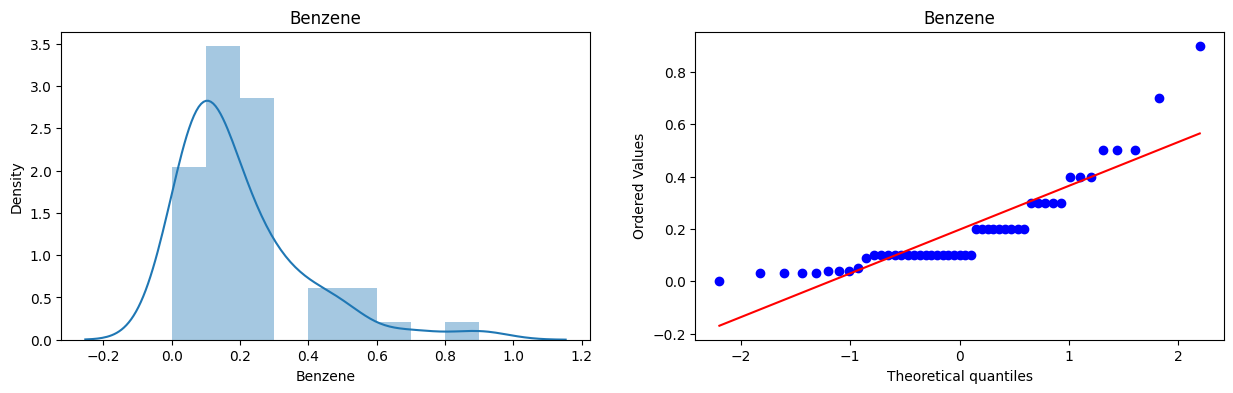

In [92]:
for col in x1_train:
    plt.figure(figsize = (15, 4))
    plt.subplot(121)
    sns.distplot(x1_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(x1_train[col], dist="norm", plot=plt)
    plt.title(col)
    plt.show()

### TRANSFORMATION UNIT ( POWER TRANSFORMATION {BOX-COX TRANS. AND YEO JONSHON TRANS.} )

##### BOX-COX TRANSFORMATION 

In [93]:
pt = PowerTransformer(method="box-cox")

In [94]:
train_transformed_1 = pt.fit_transform(x1_train + 0.00001)
test_transformed_1 = pt.fit_transform(x1_test)
pd.DataFrame({'col': x1_train.columns, 'Tranformed': pt.lambdas_})

col  Tranformed
0     PM10   -0.636949
1      SO2   -0.263761
2      NOx    2.352882
3    PM2.5    0.447919
4      NH3    0.825519
5       O3   -0.394771
6       CO    0.093783
7  Benzene    0.129116

In [95]:
train_transformed_1 = pd.DataFrame(train_transformed_1, columns = x1_train.columns )

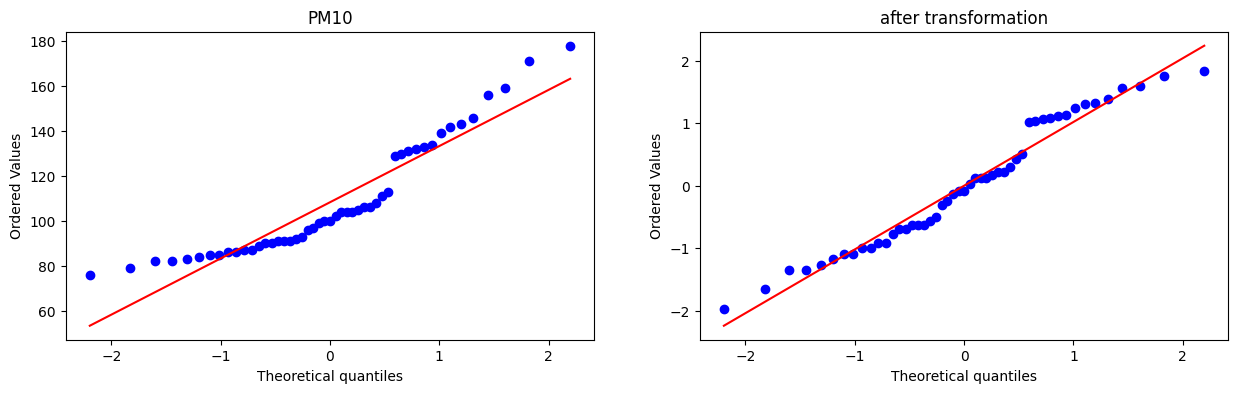

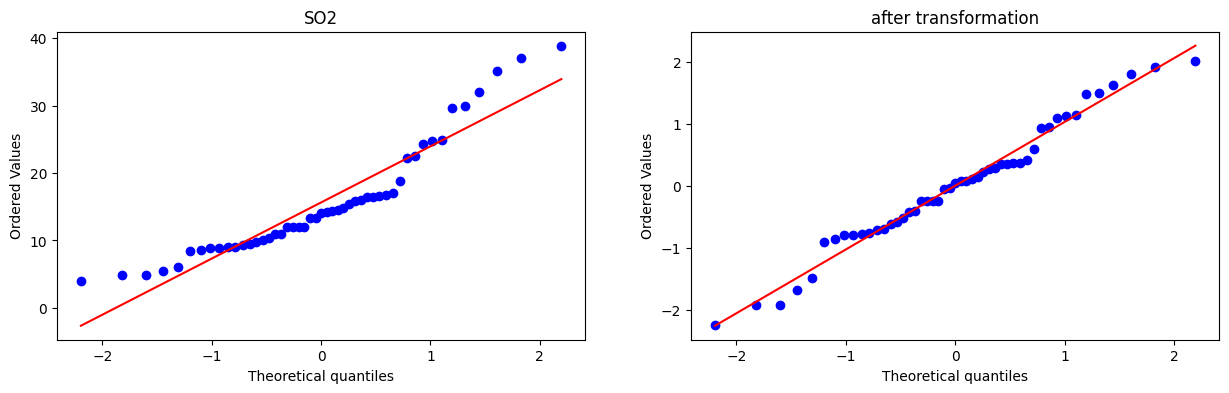

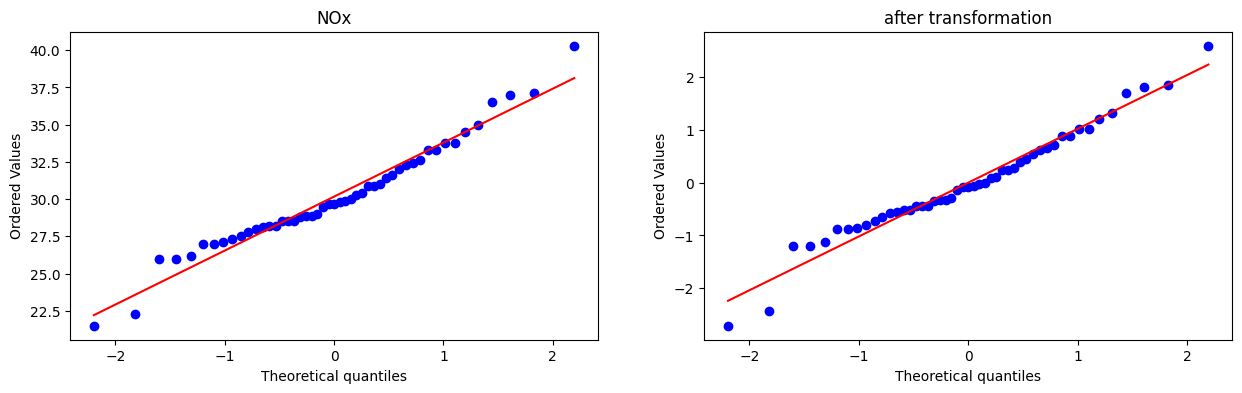

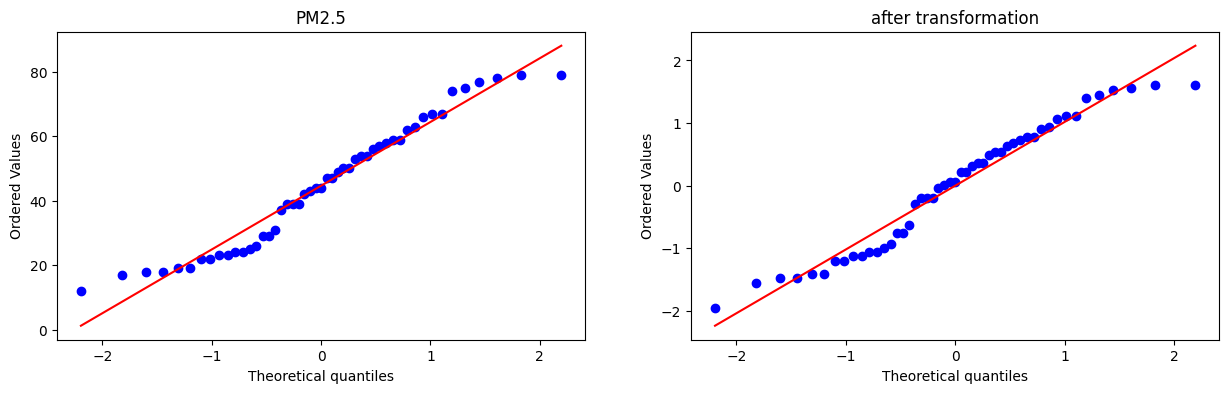

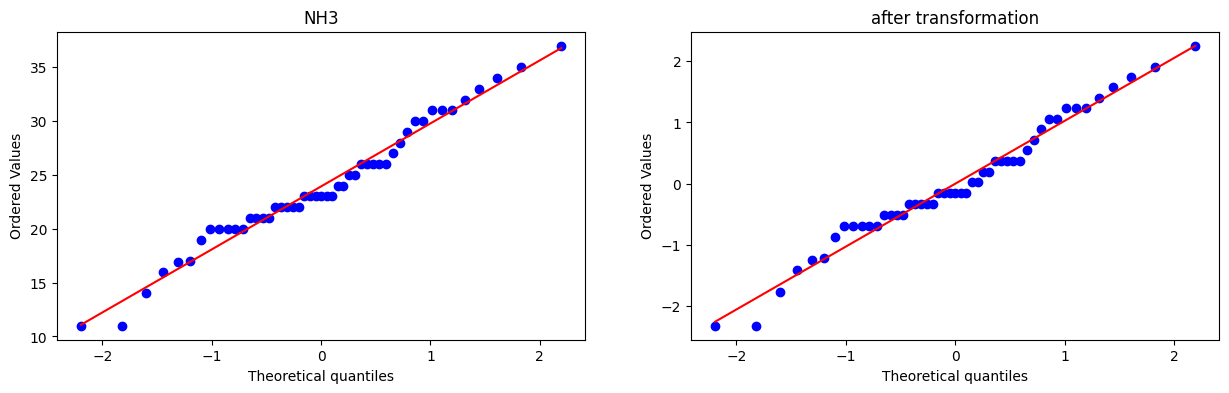

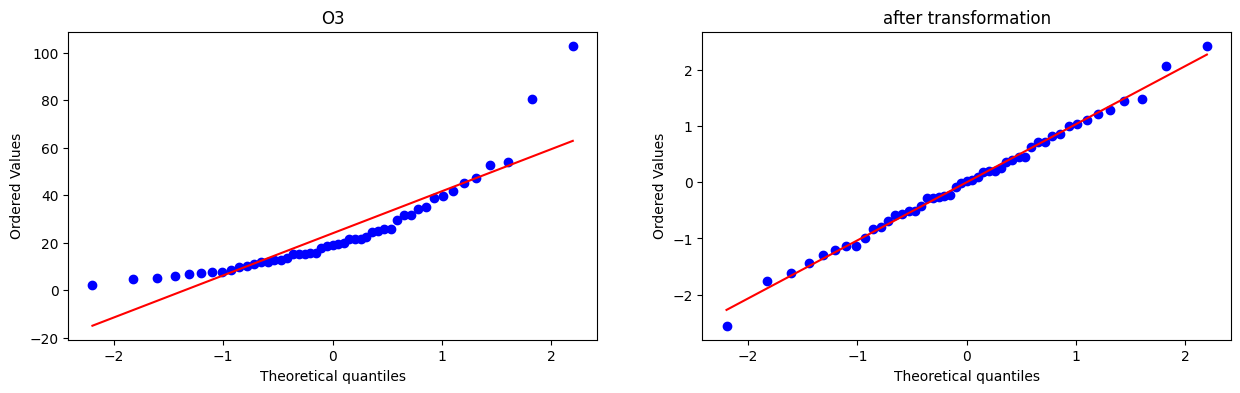

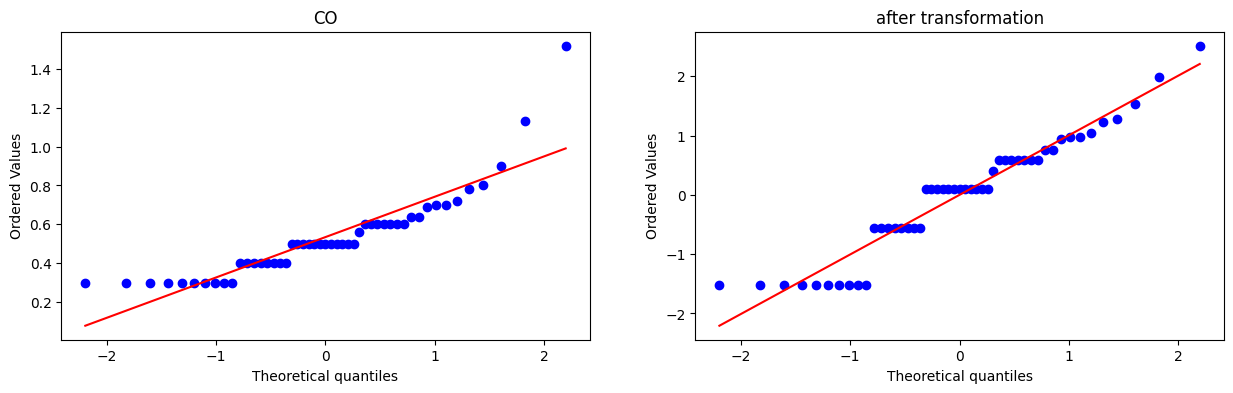

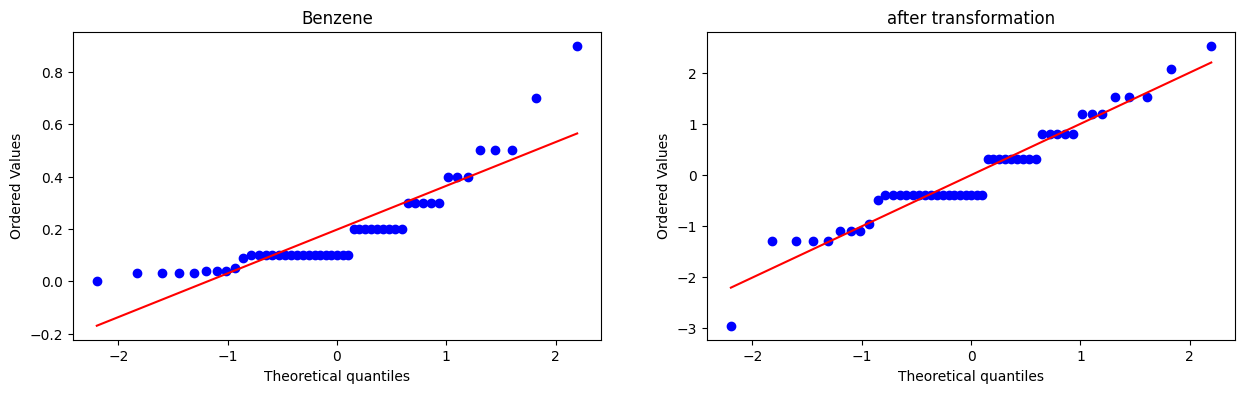

In [96]:
for col_5 in train_transformed_1.columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(121)
    stats.probplot(x1_train[col_5], dist="norm", plot=plt)
    plt.title(col_5)   
    
    plt.subplot(122)
    stats.probplot(train_transformed_1[col_5], dist="norm", plot=plt)
    plt.title("after transformation")
    plt.show()

##### YEO JONSHON TRANSFORMATION

In [97]:
pt2 = PowerTransformer()
train_transformed_2 = pt2.fit_transform(x1_train)
test_transformed_2 = pt2.fit_transform(x1_test)
pd.DataFrame({'col': x1_train.columns, 'Transformed': pt2.lambdas_})

col  Transformed
0     PM10    -0.650751
1      SO2    -0.360108
2      NOx     2.405270
3    PM2.5     0.444781
4      NH3     0.828279
5       O3    -0.451177
6       CO    -1.515269
7  Benzene    -2.814726

In [98]:
train_transformed_2 = pd.DataFrame(train_transformed_2, columns= x1_train.columns)

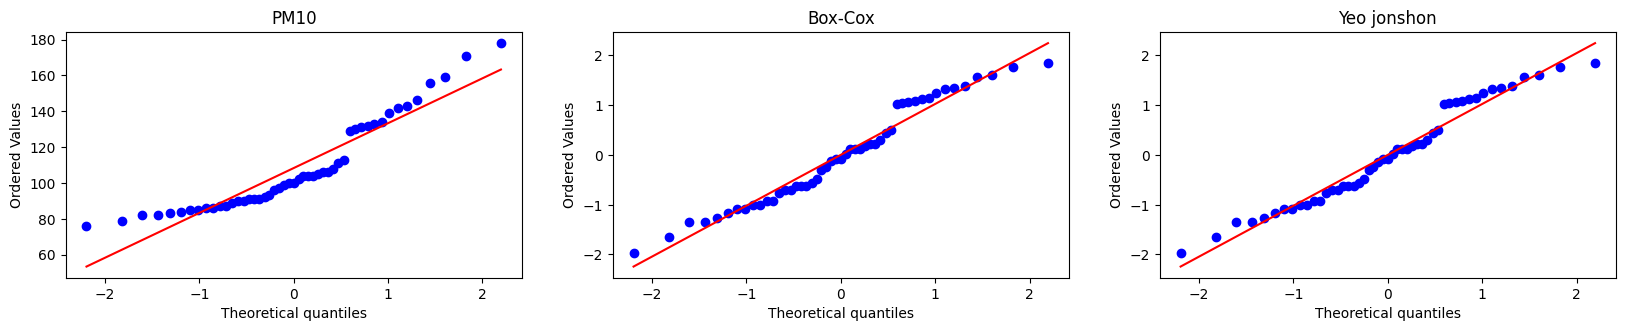

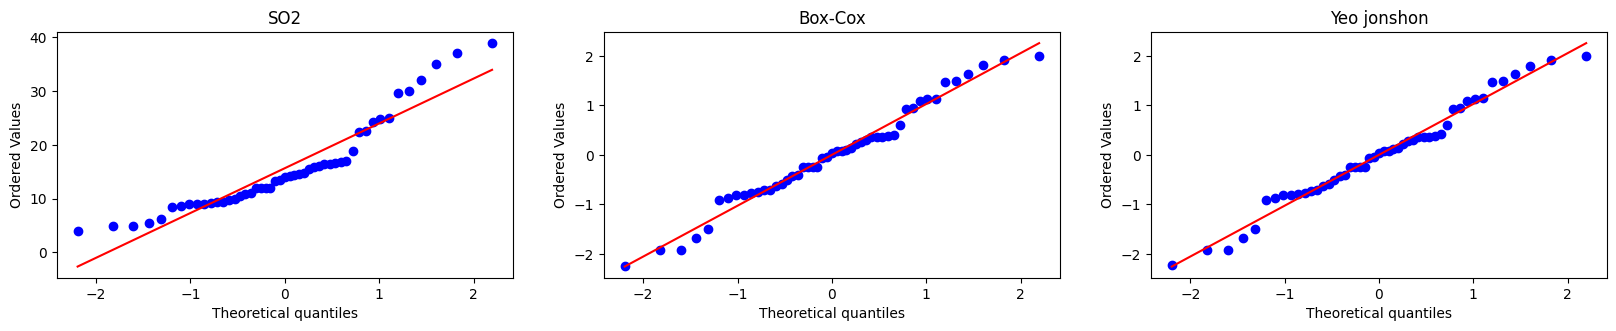

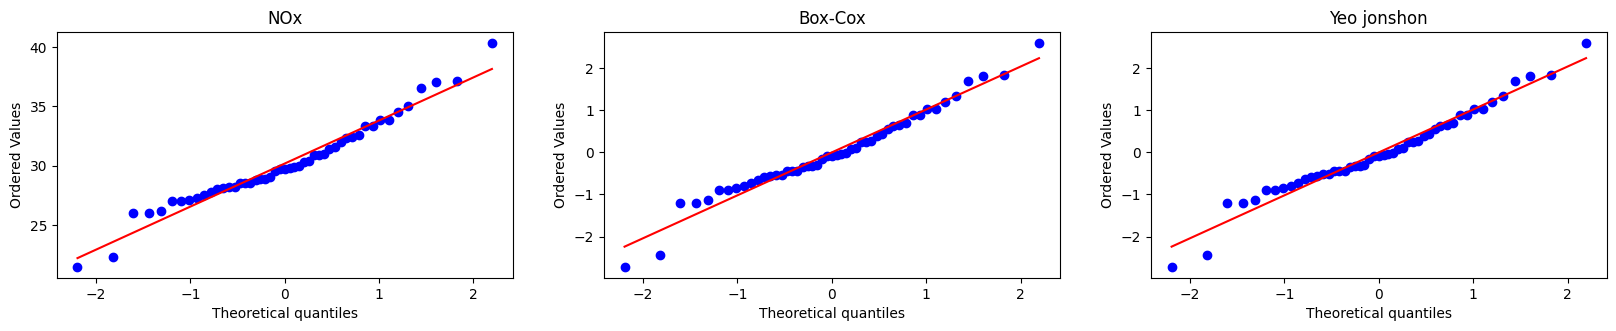

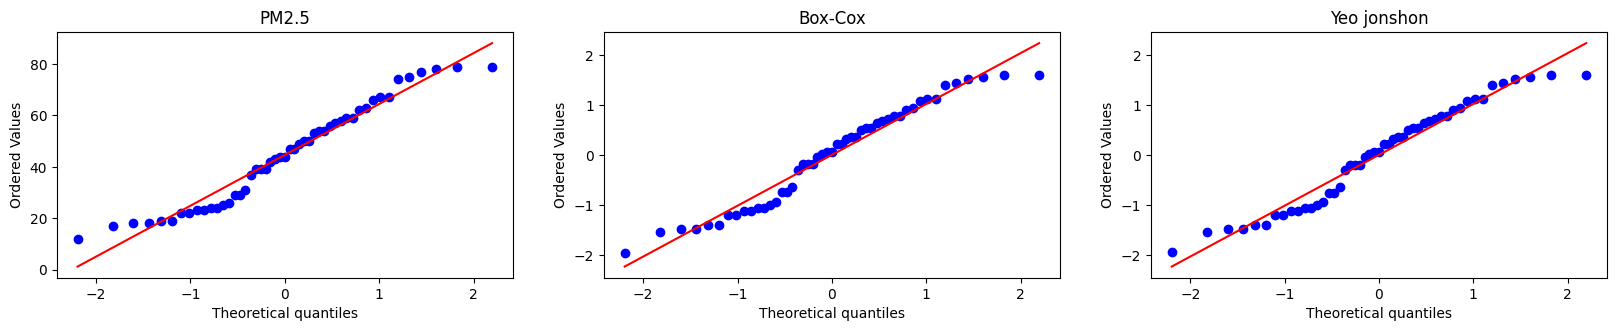

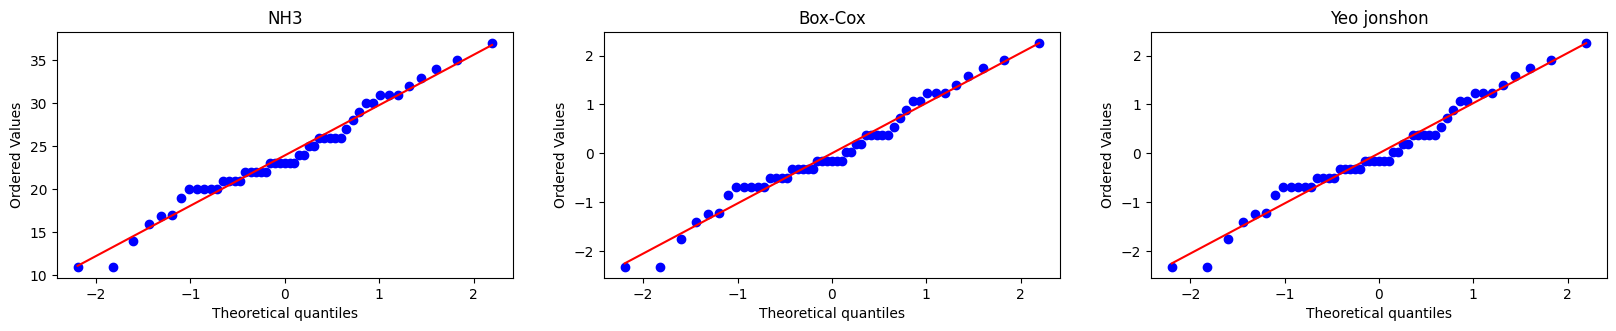

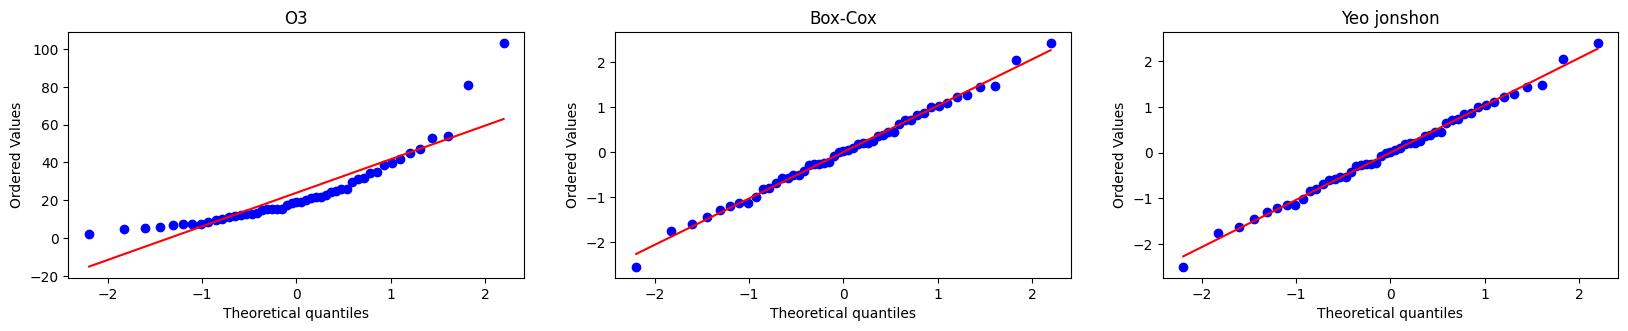

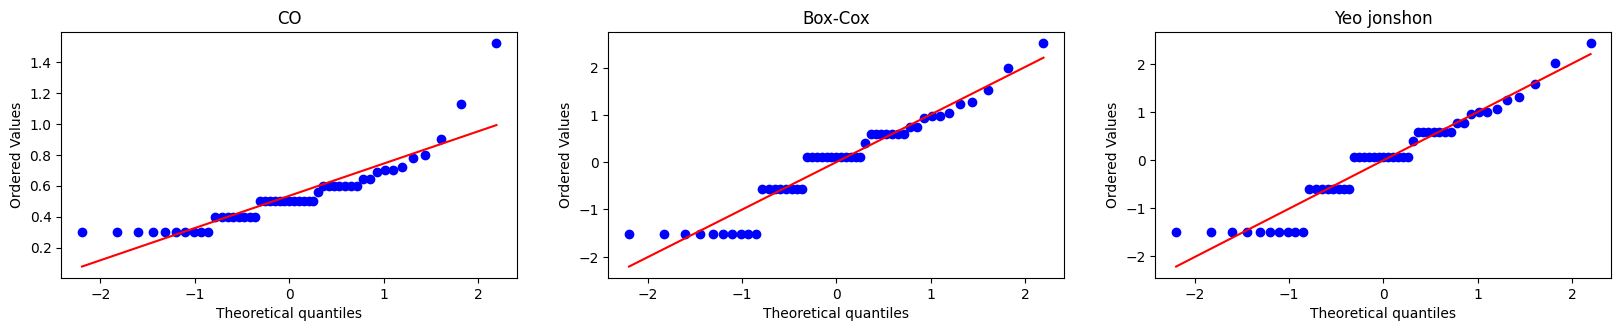

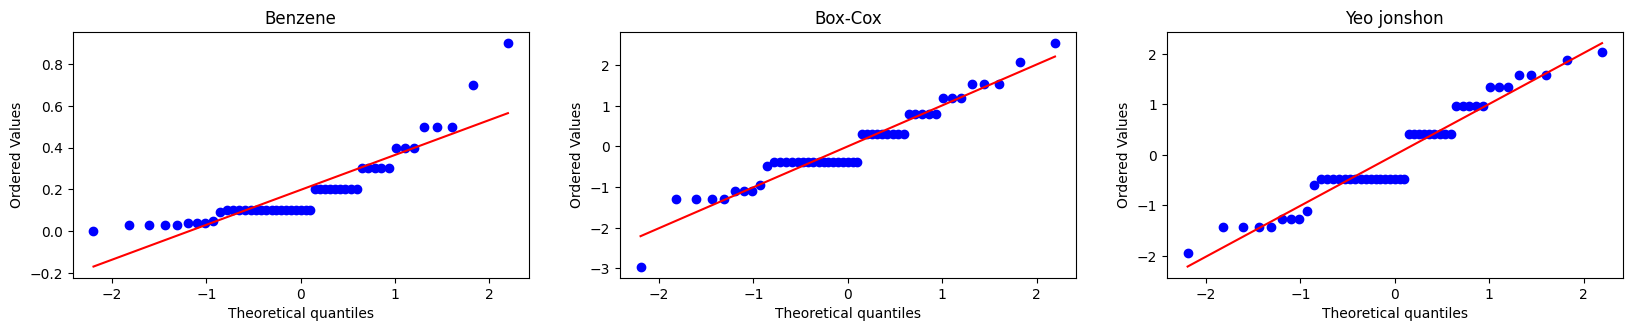

In [99]:
for col_6 in train_transformed_2.columns:
    plt.figure(figsize=(20, 30))
    plt.subplot(8, 3, 1)
    stats.probplot(x1_train[col_6], dist="norm", plot=plt)
    plt.title(col_6)   
    
    plt.subplot(8, 3, 2)
    stats.probplot(train_transformed_1[col_6], dist="norm", plot=plt)
    plt.title("Box-Cox")
    
    plt.subplot(8, 3, 3)
    stats.probplot(train_transformed_2[col_6], dist="norm", plot=plt)
    plt.title("Yeo jonshon")
    
    plt.show()

### GAUSSIAN TRANSFORMATION {LOGARITHMIC, RECIPROCAL, EXPONENTIAL & SQUARE ROOT}

In [104]:
def apply_transformer(transformer):
    
    x1 = df.drop('AQI', axis = 1)
    y1 = df.iloc[:, -1]
    y1 = y1.astype(int)
    
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)
    
    ft_uni = FunctionTransformer(transformer)
    x_train_universal = ft_uni.fit_transform(x1_train + 0.0001)
    x_test_universal = ft_uni.fit_transform(x1_test + 0.0001)
    
    x_train_universal = pd.DataFrame(x_train_universal, columns= x1_train.columns)
    
    for col_8 in x_train_universal:
        plt.figure(figsize=(17, 4))
        plt.subplot(121)
        sns.distplot(x_train_universal[col_8])
        plt.title(col_8)
        
        plt.subplot(122)
        stats.probplot(x_train_universal[col_8], dist='norm', plot=plt)
        plt.title(col_8)
        plt.show()

##### LOGARITHMIC TRANSFORMATION

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




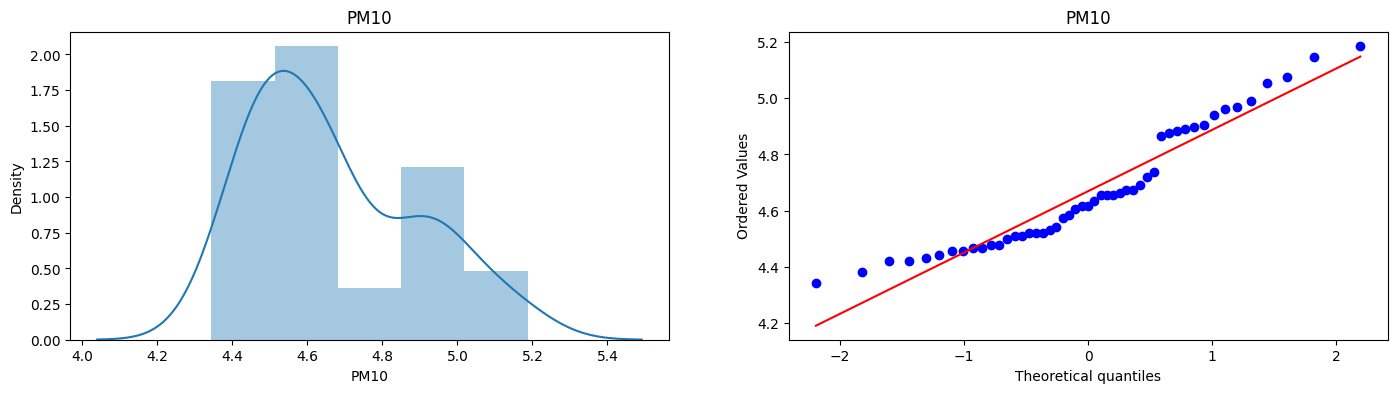

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




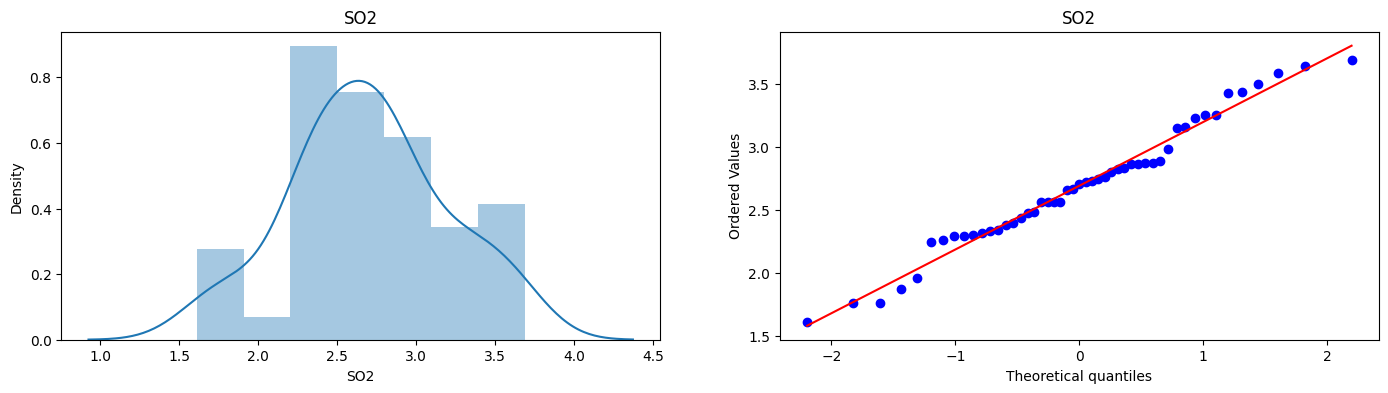

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




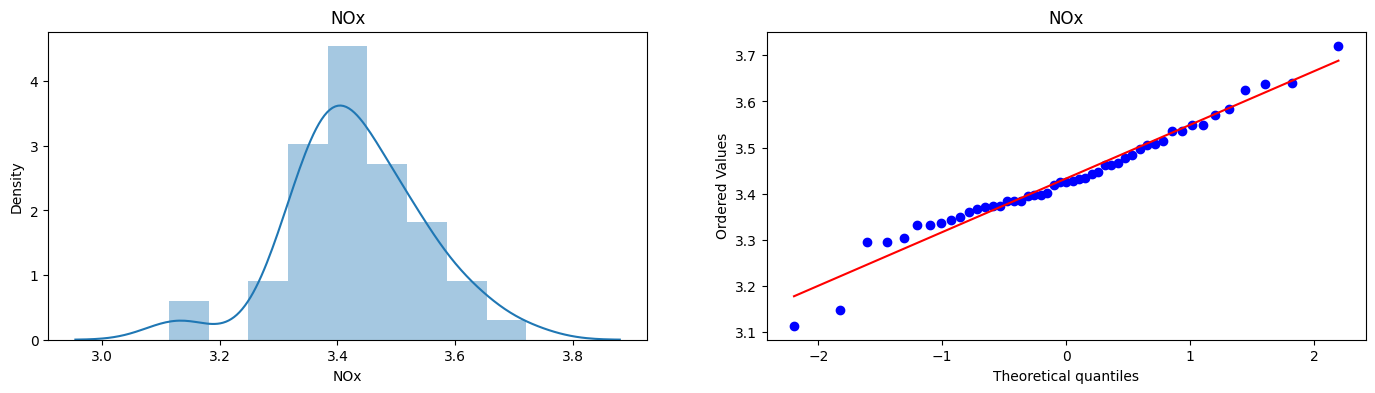

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




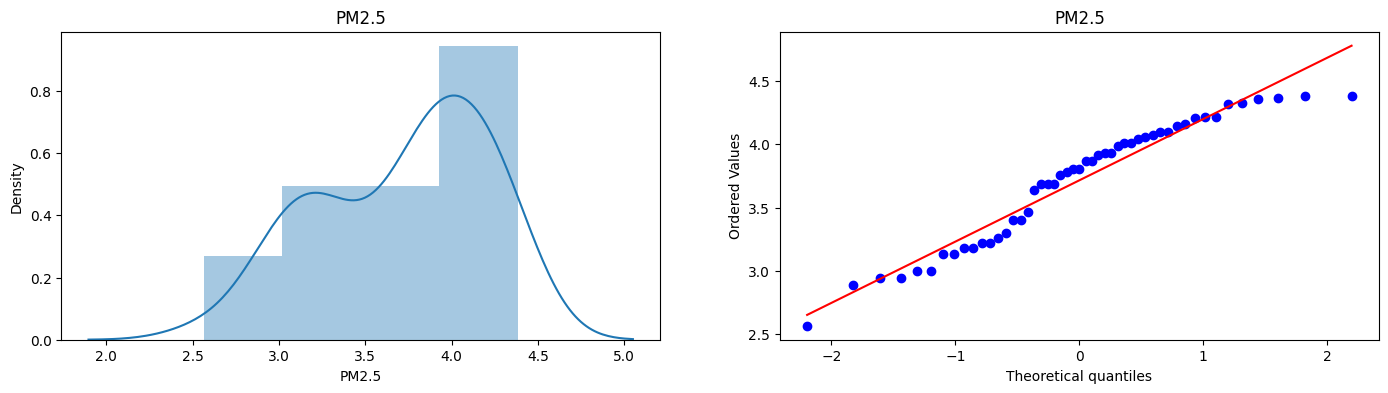

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




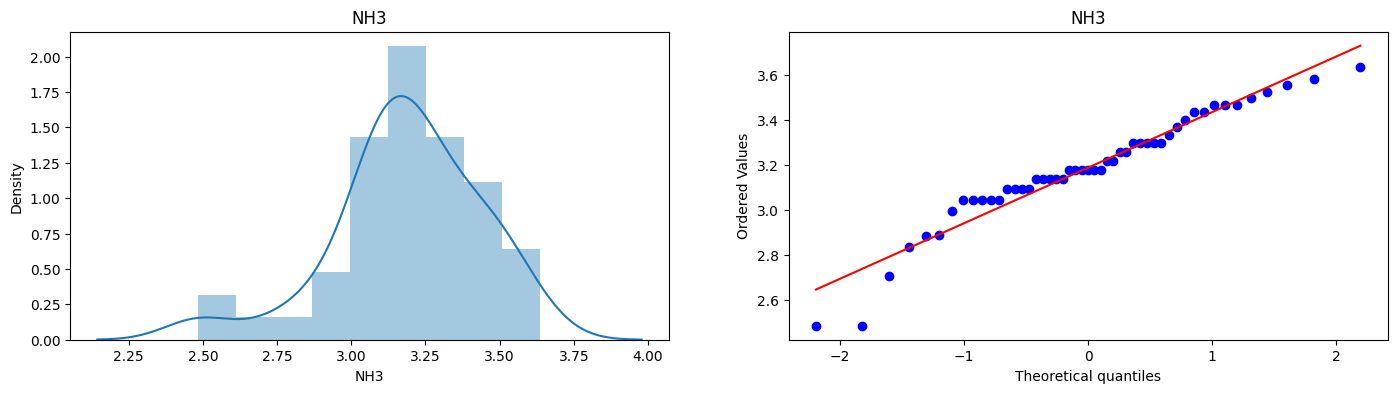

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




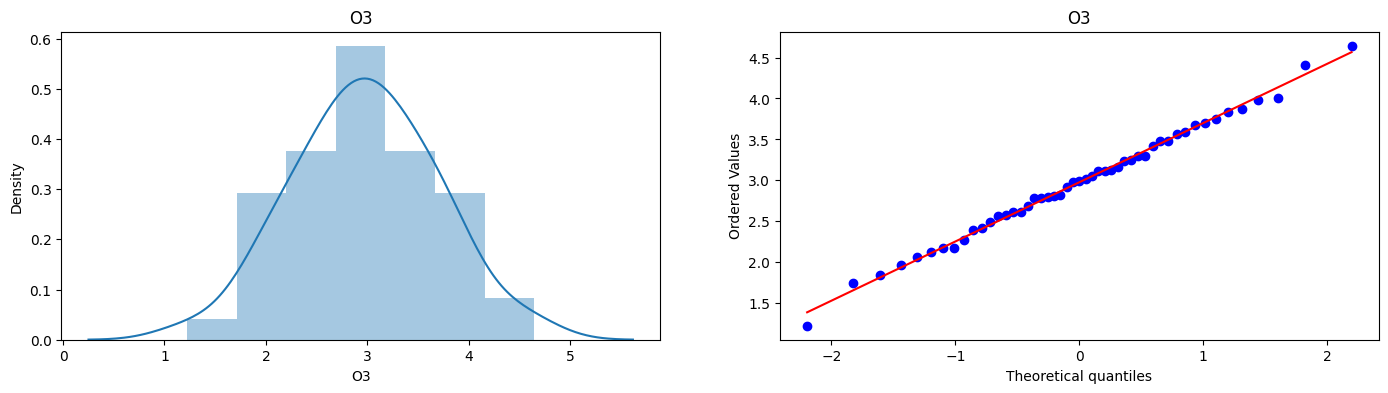

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




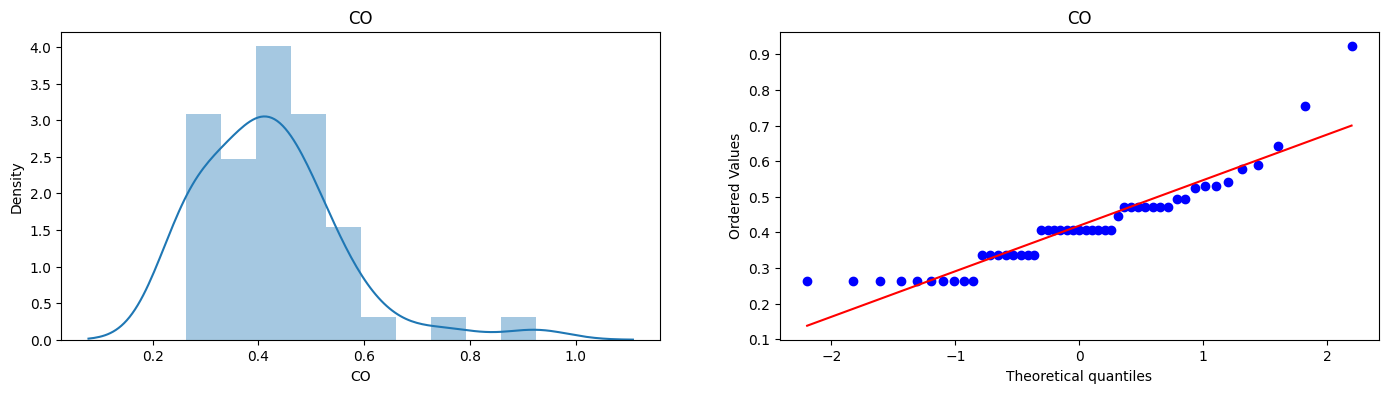

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




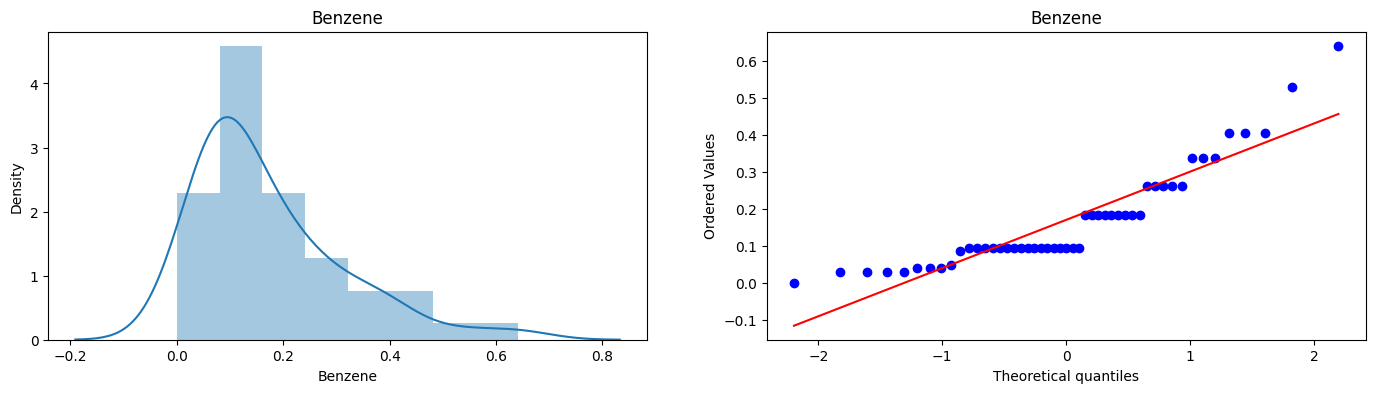

In [105]:
apply_transformer(np.log1p)

#####  RECIPROCAL TRANSFORMATION

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




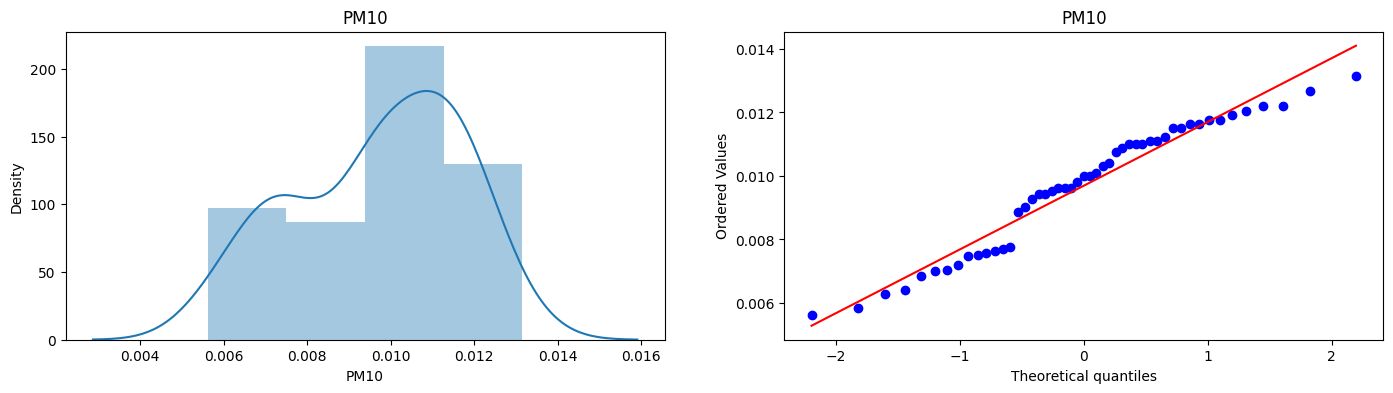

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




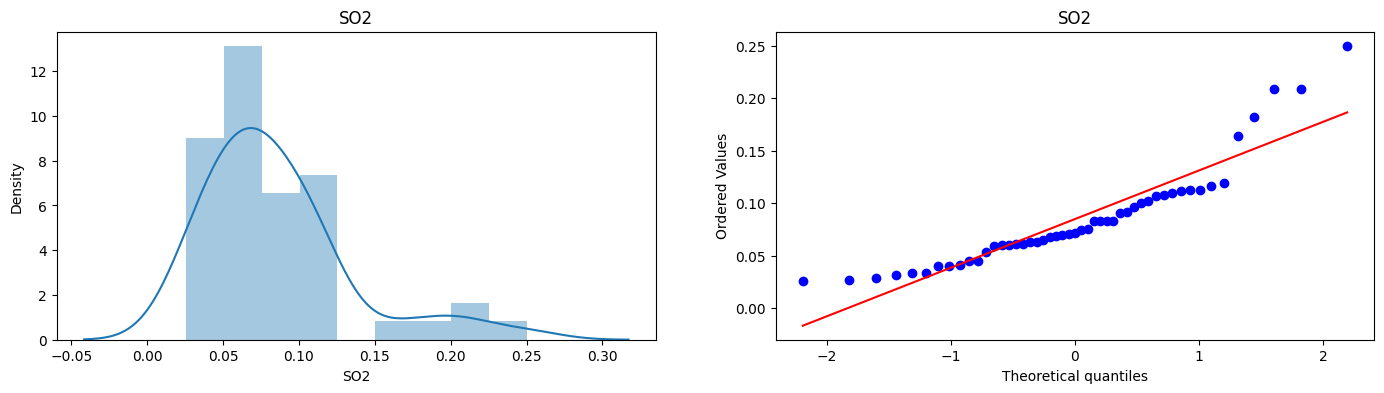

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




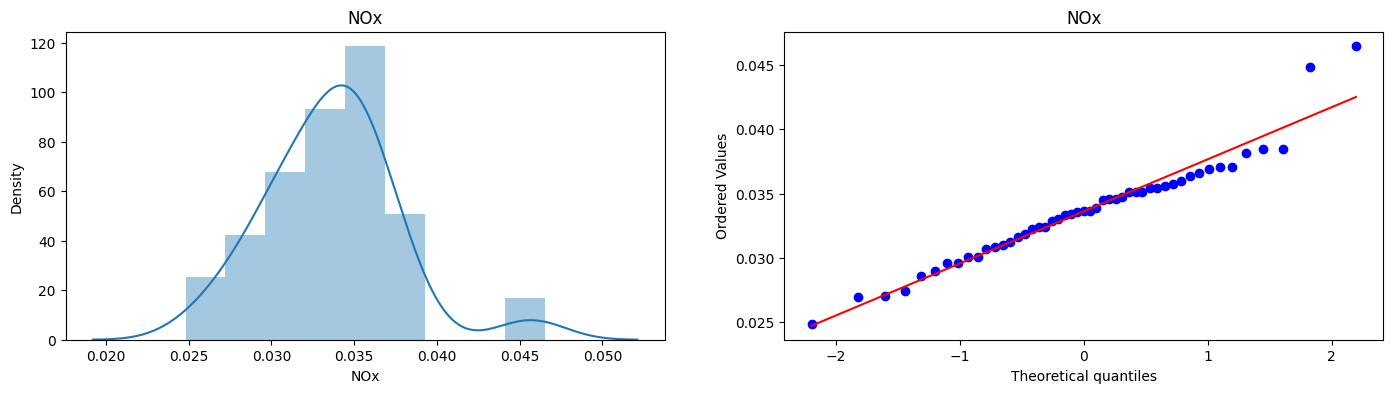

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




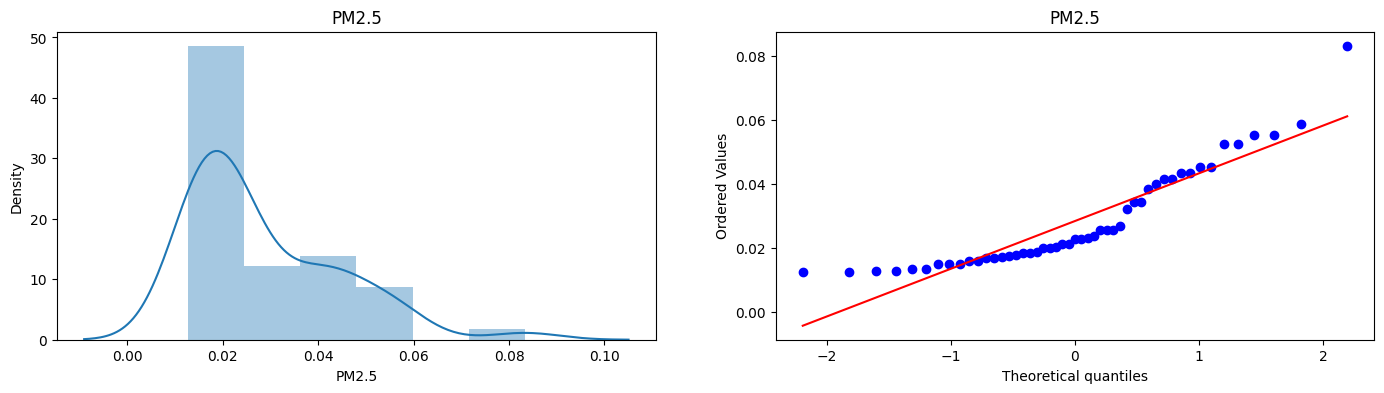

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




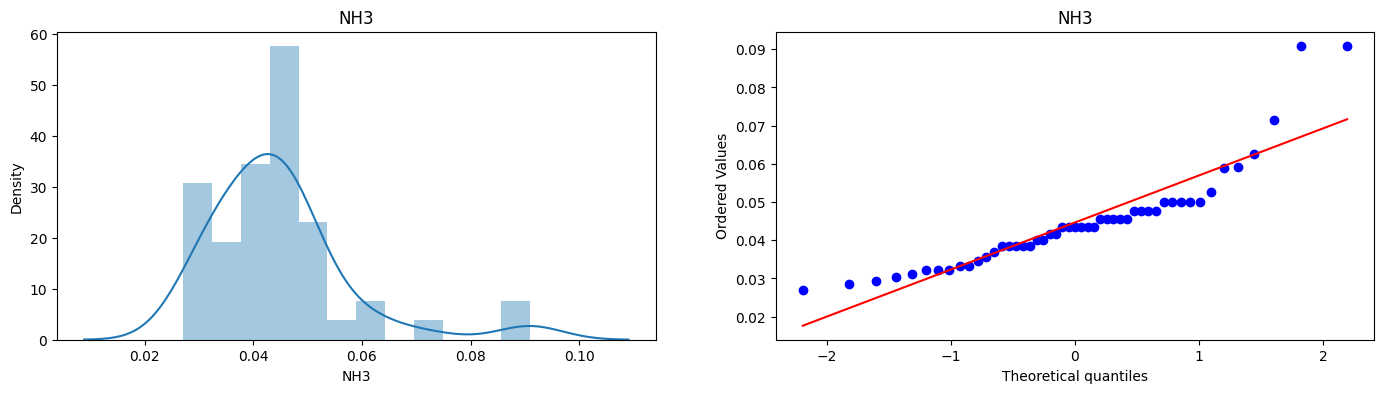

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




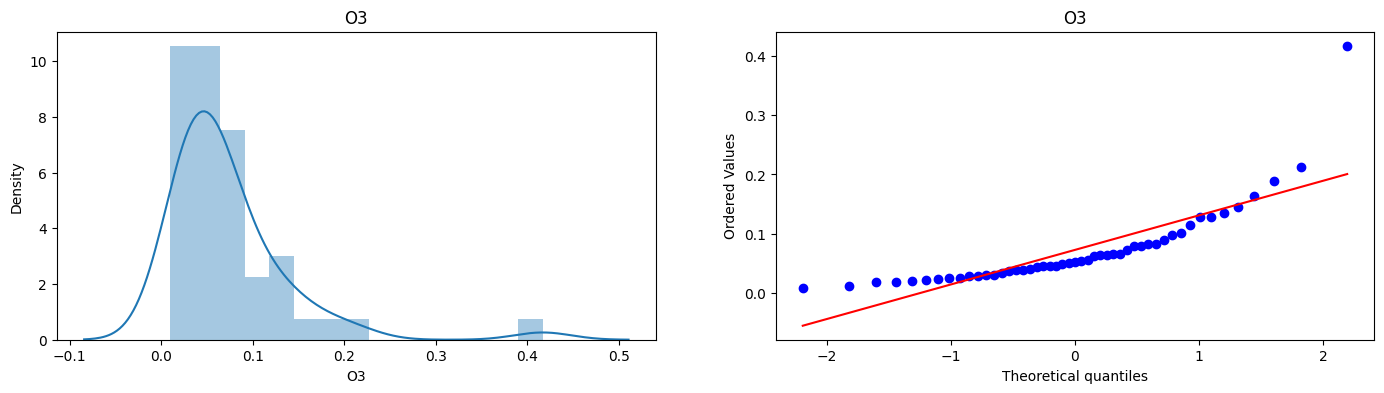

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




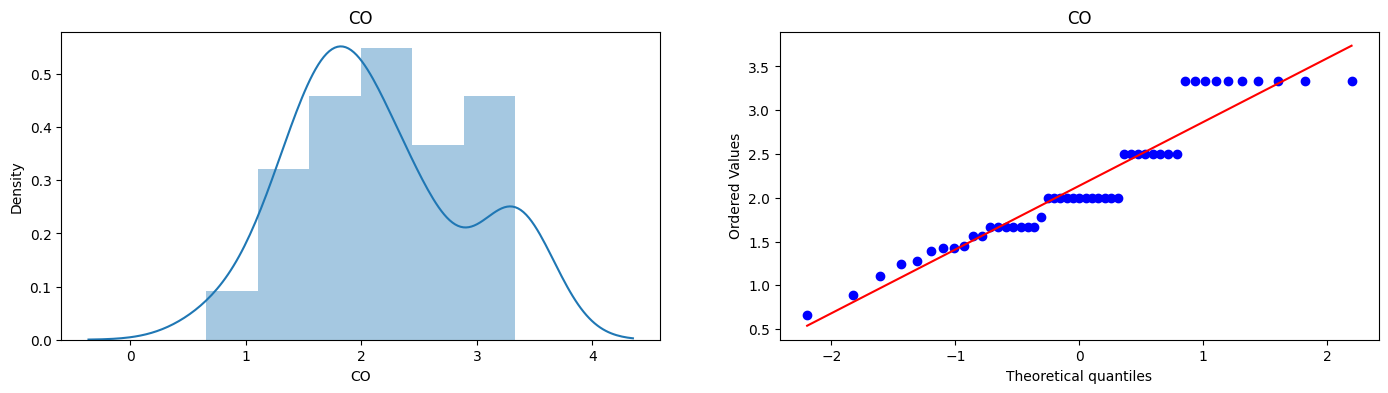

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




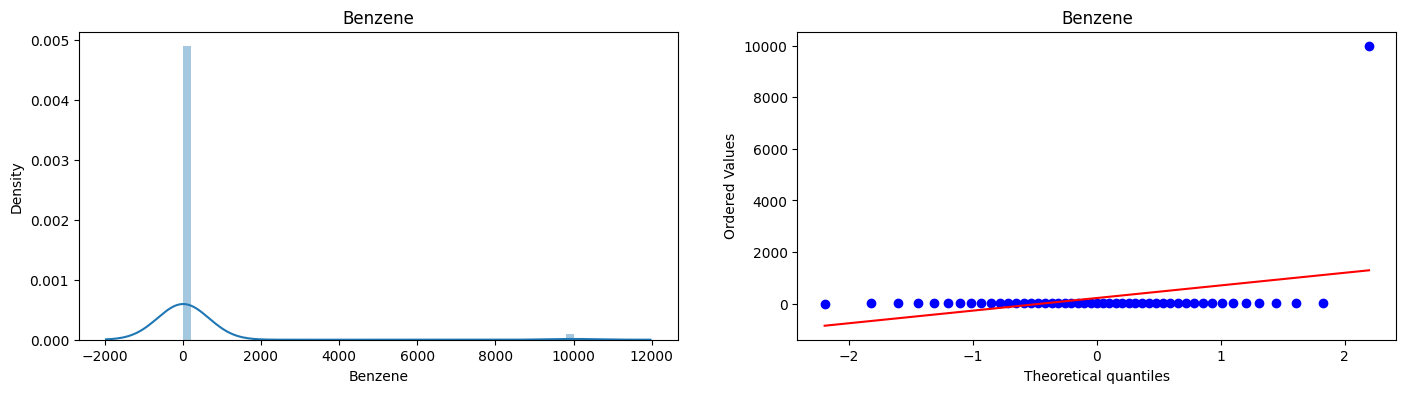

In [106]:
apply_transformer(np.reciprocal)

##### SQUARE ROOT TRANSFORMATION

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




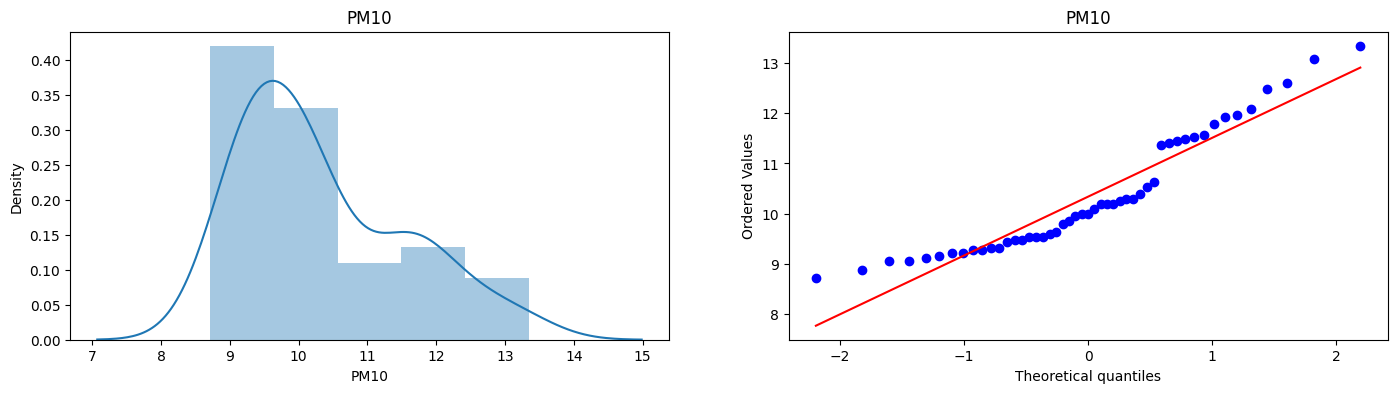

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




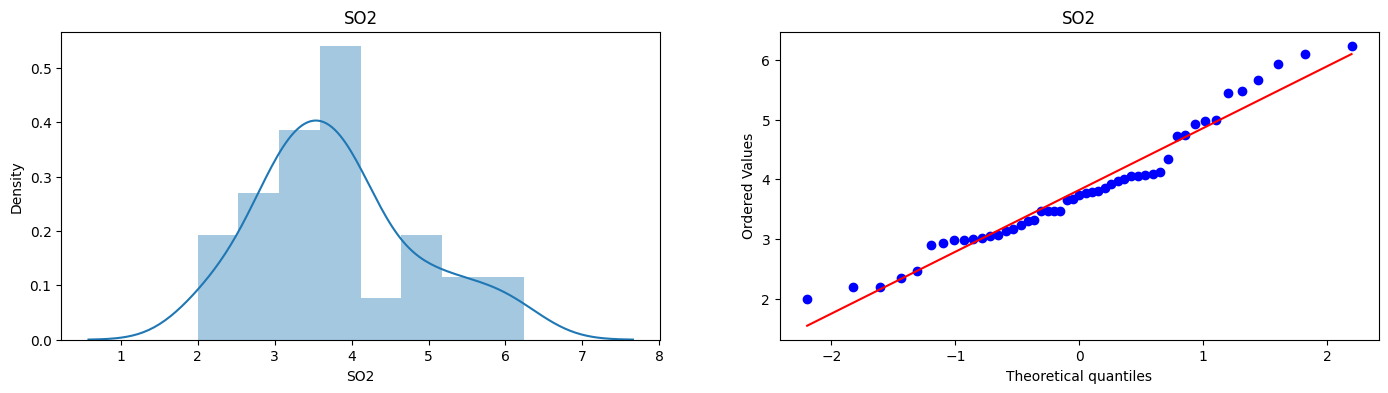

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




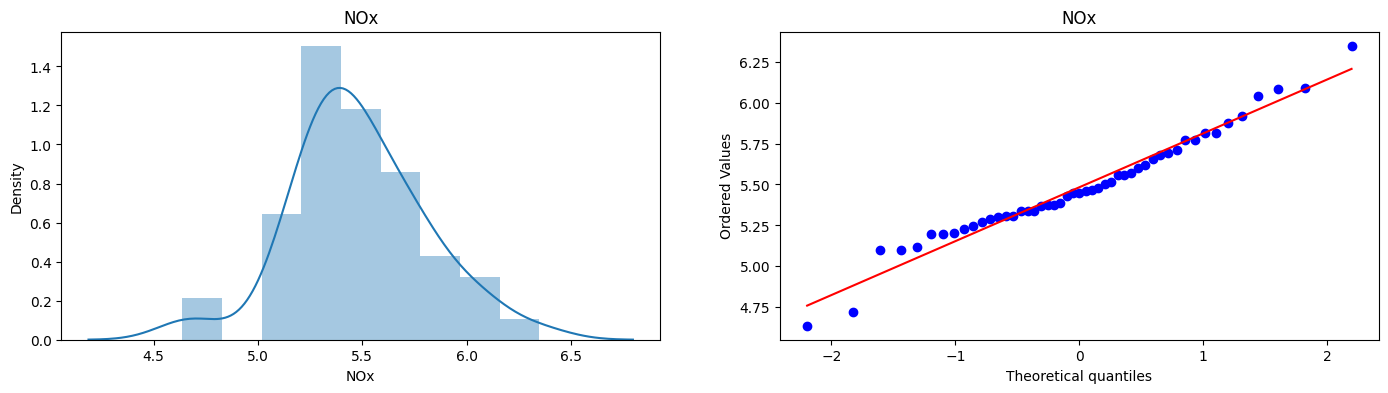

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




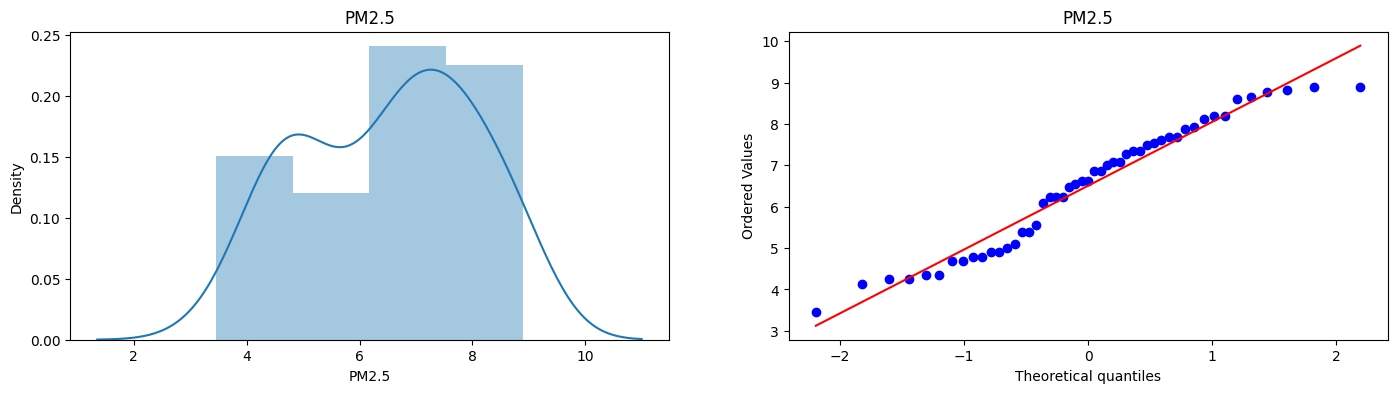

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




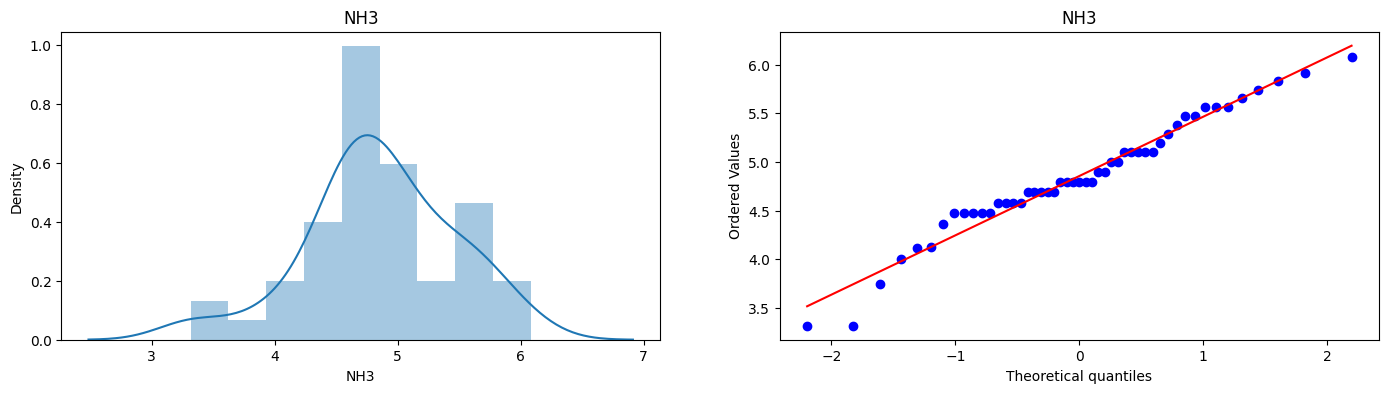

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




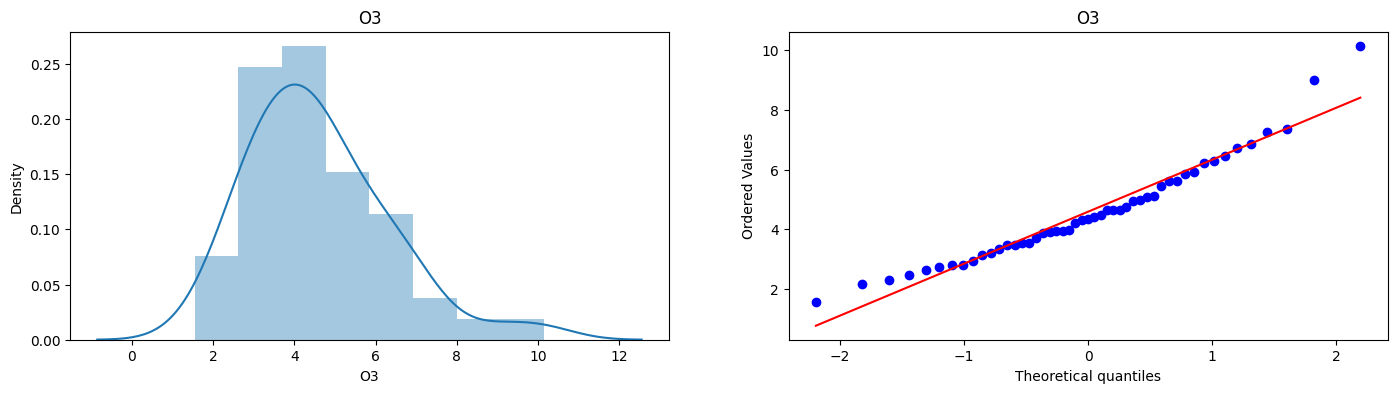

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




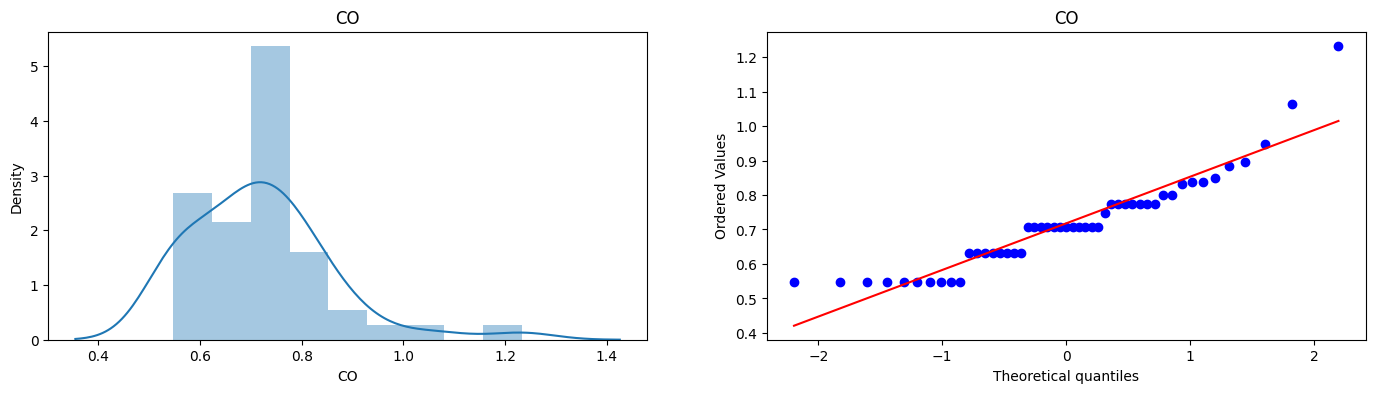

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




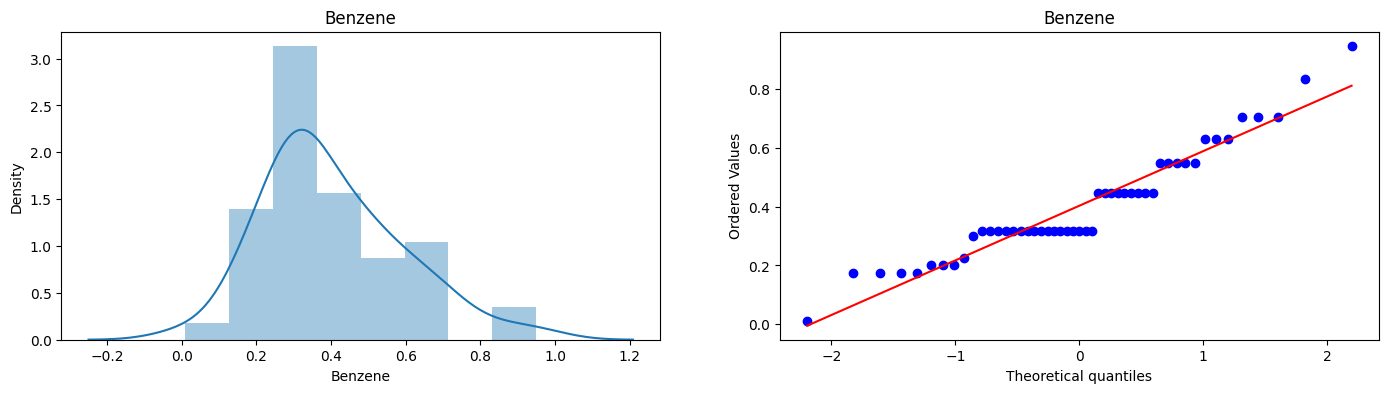

In [107]:
apply_transformer(np.sqrt)

##### EXPONENTIALTRANSFORMATION

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




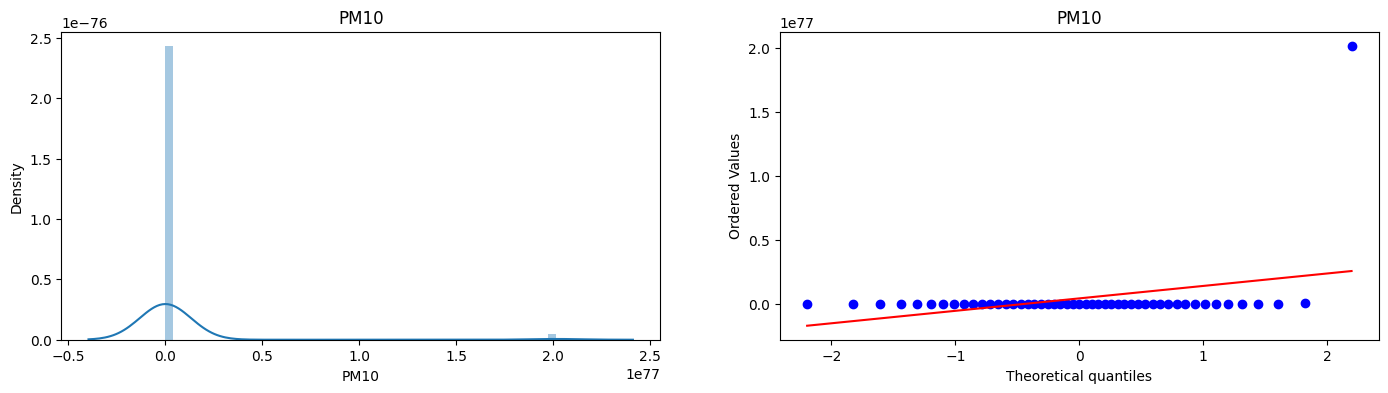

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




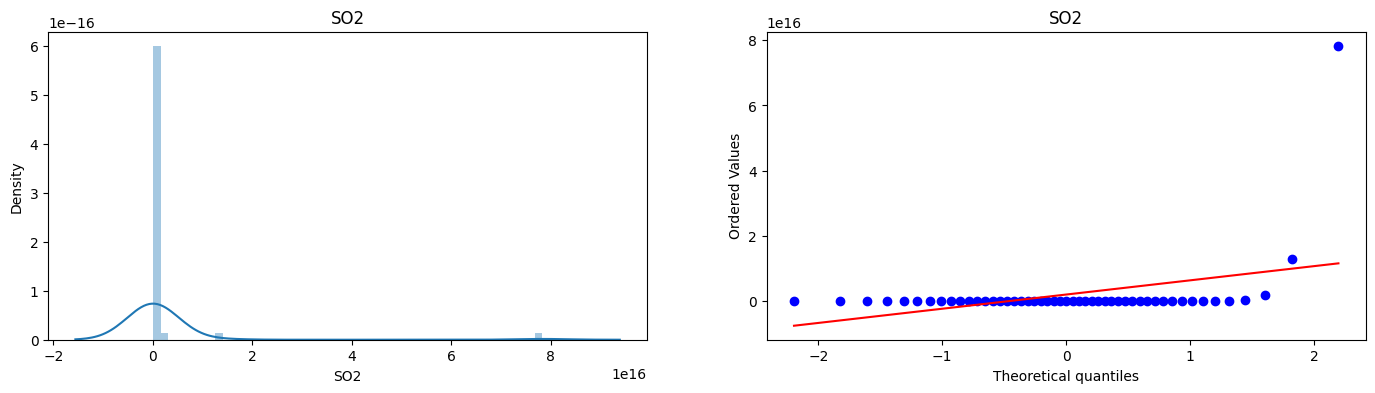

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




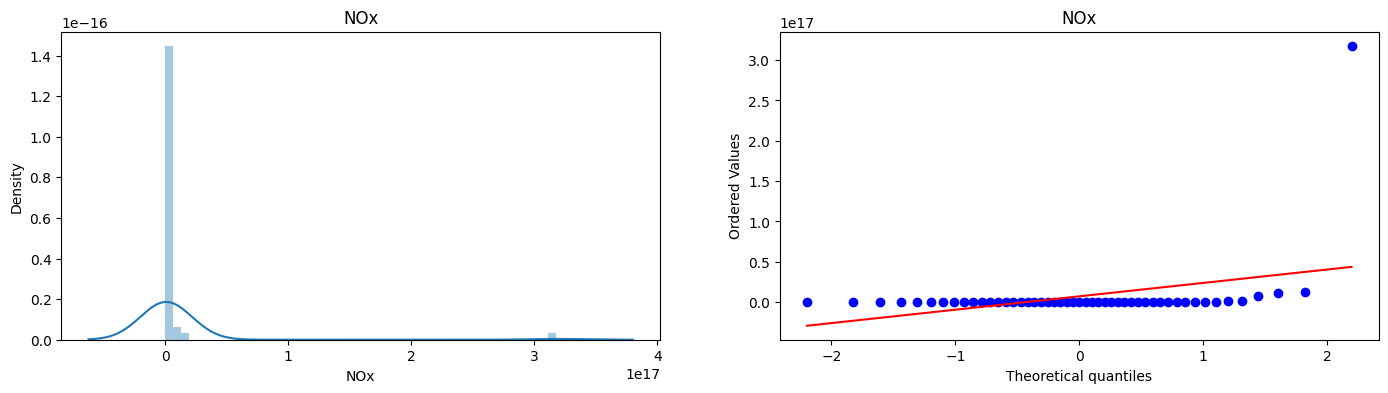

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




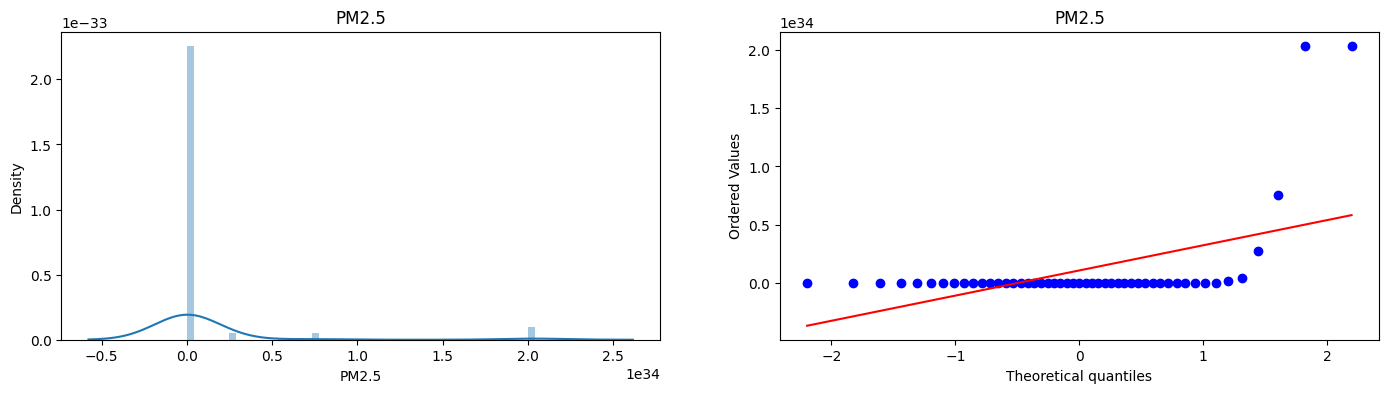

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




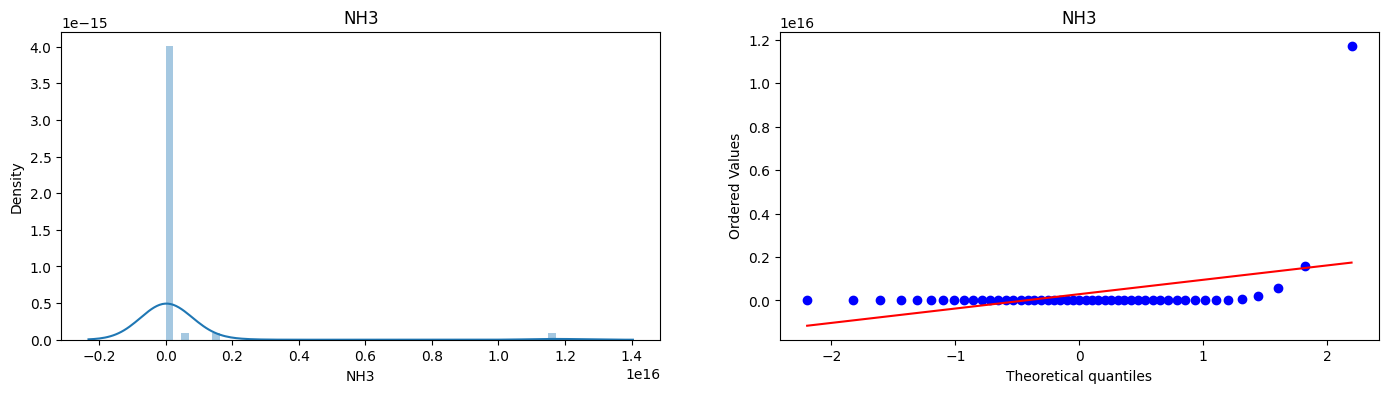

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




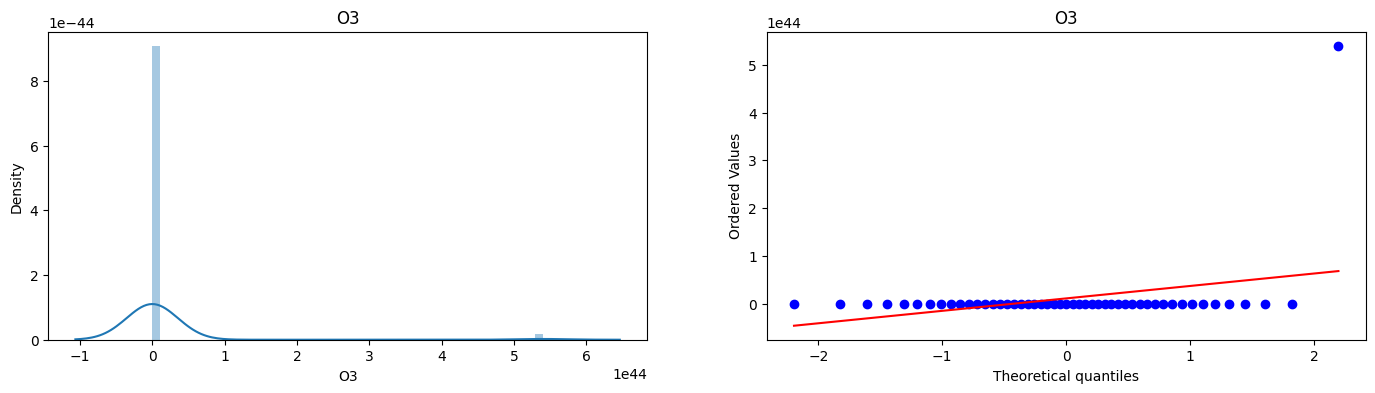

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




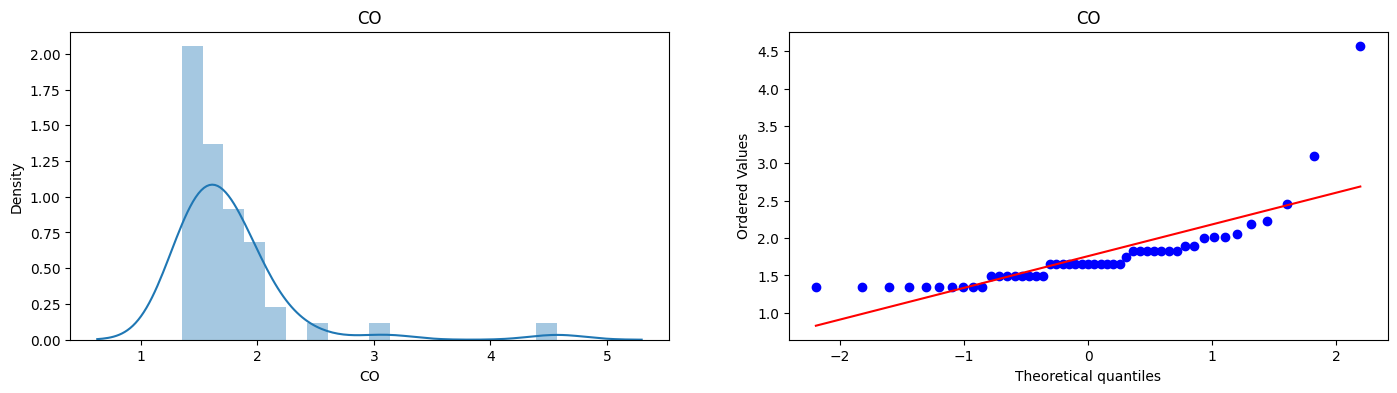

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




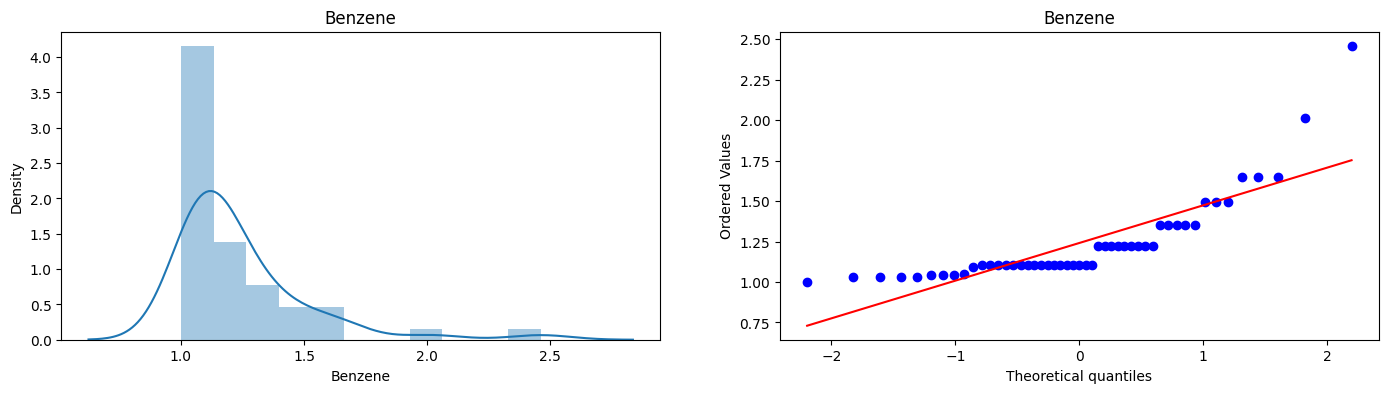

In [108]:
apply_transformer(np.exp)

##### LOGARITHMIC TRANSFORMATION

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




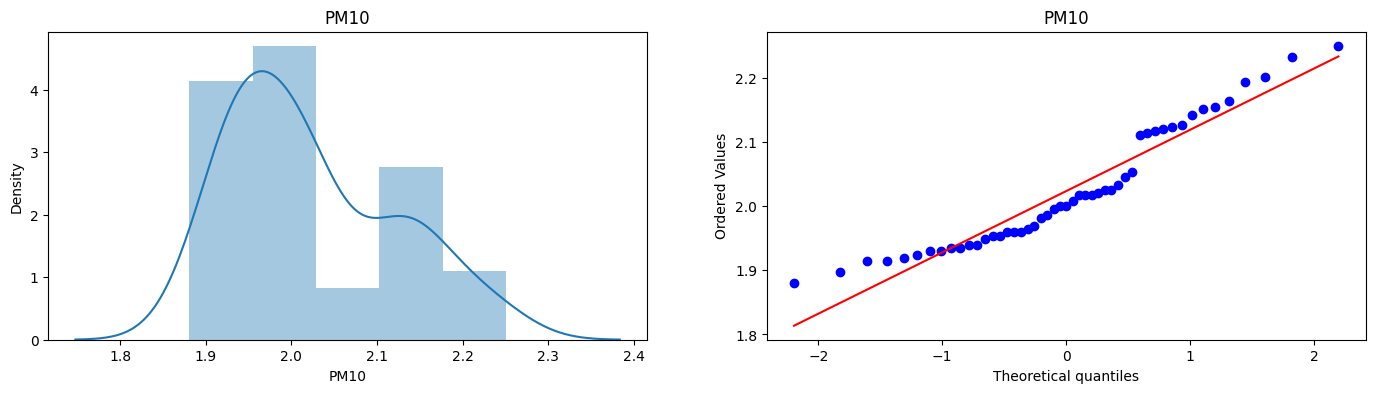

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




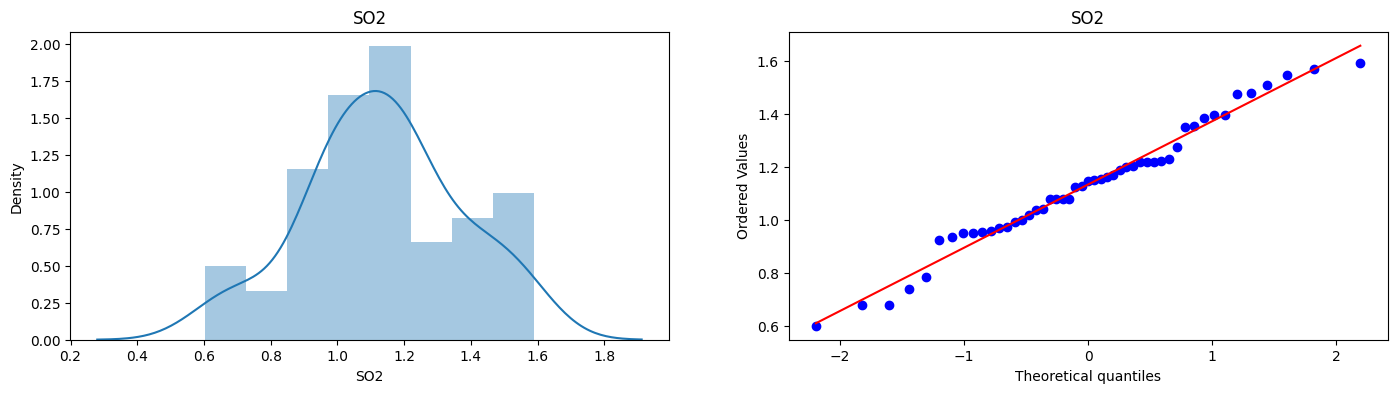

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




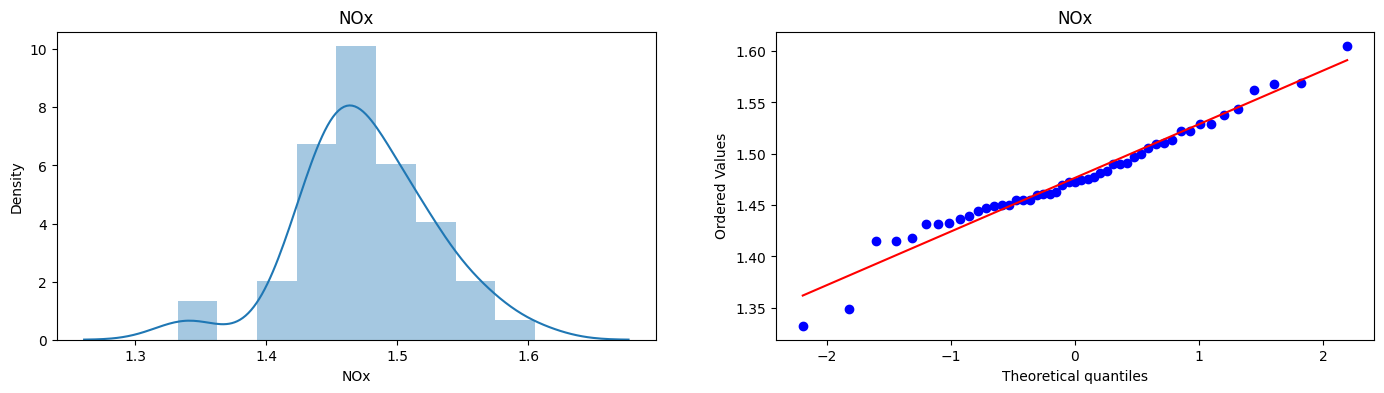

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




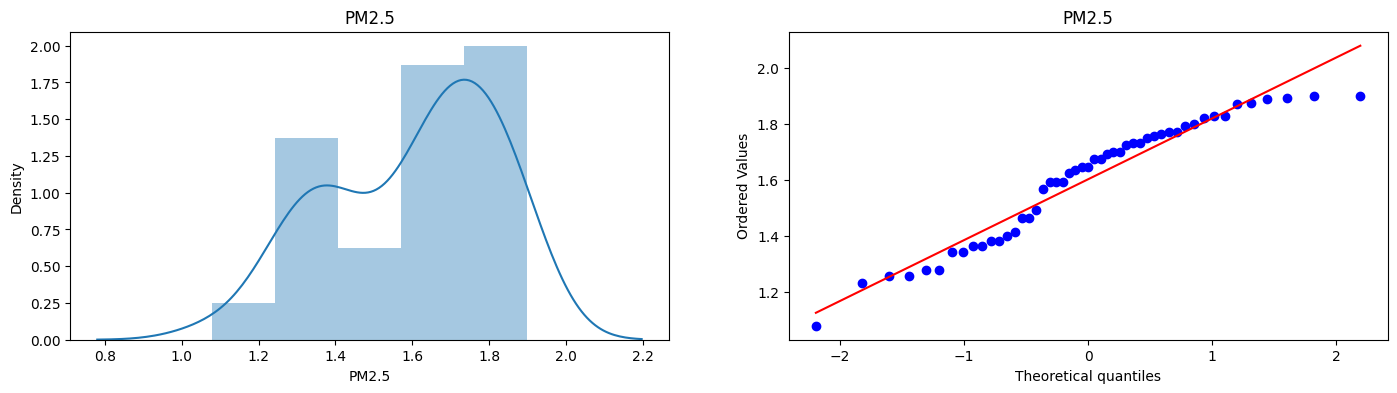

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




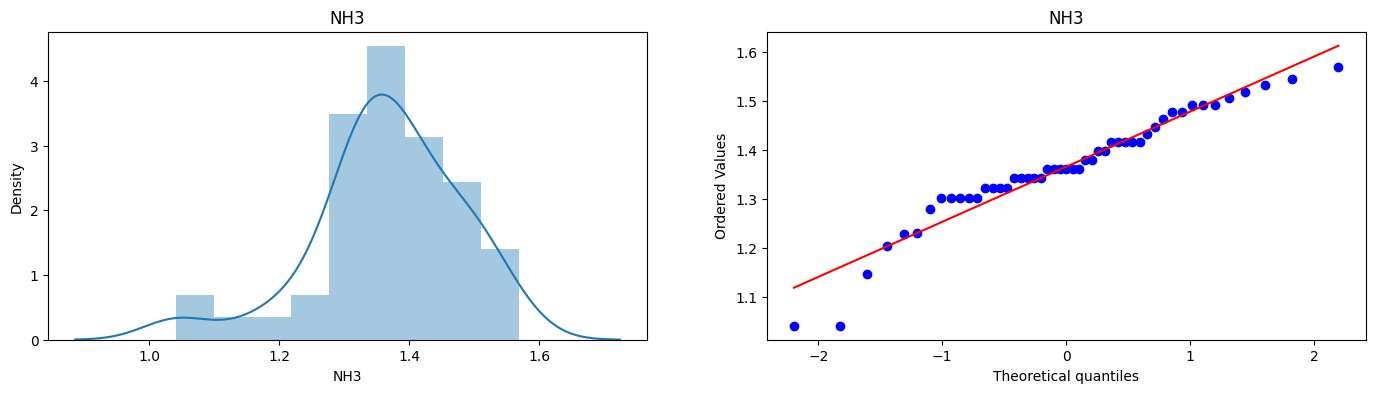

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




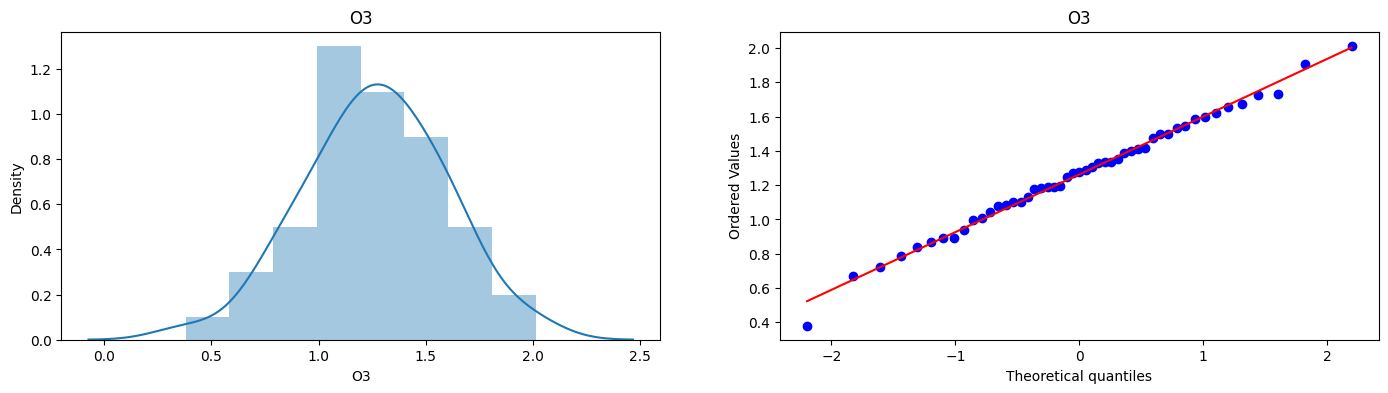

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




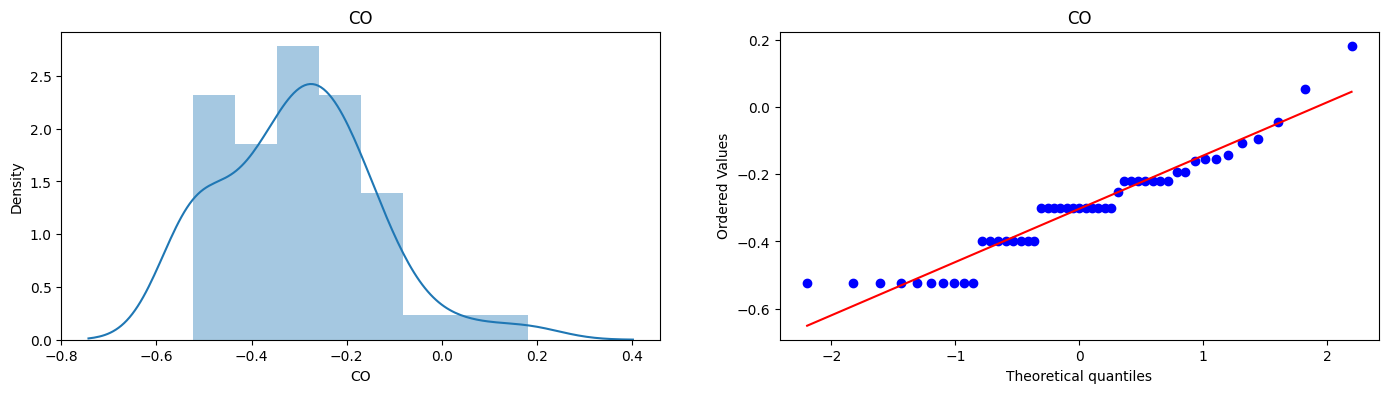

C:\Users\bhara\AppData\Local\Temp\ipykernel_1420\5052884.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




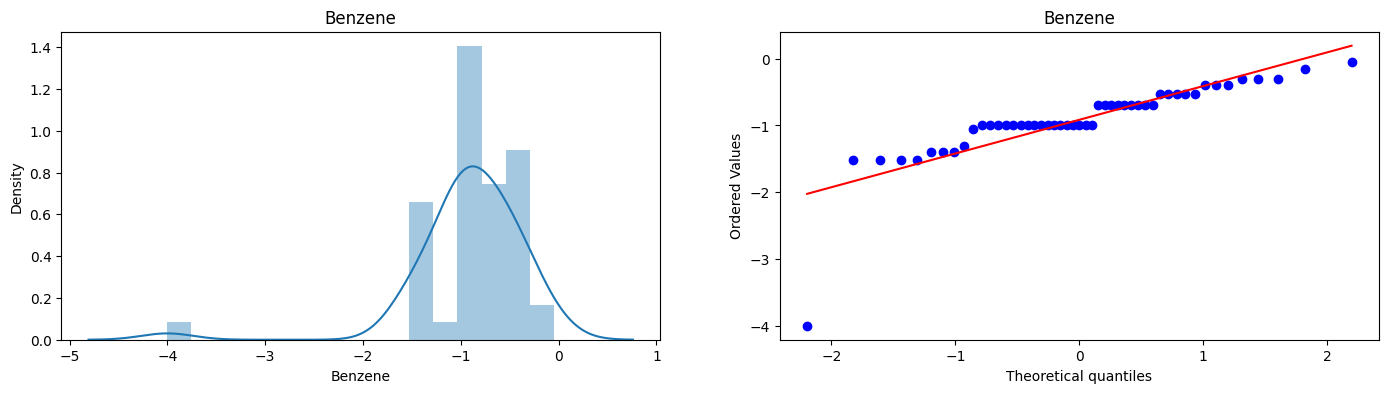

In [109]:
apply_transformer(np.log10)

## CONCLUSION :

After analysisng all the tranformation inside the training dataset we have the basic out of best ideas for which transformation is better work on which columns. Now we can apply  the column transformation inside the training dataset, where we put selected transformer for the selected columns which helps to give the better result as compare to the without transforming dataset and also make dataset more stronger in analysis as well as predictive analysis term.